In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras as keras
import tensorflow as tf
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

%config InlineBackend.figure_format = 'retina' # для более четкой отрисовки графиков

2021-09-17 14:35:59.918319: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
fashion_mnist = keras.datasets.fashion_mnist # определяем датасет
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # загружаем датасет

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] # классы в датасете

In [4]:
train_images.shape # 60к картино размера 28x28

(60000, 28, 28)

In [5]:
train_labels # метки картинок

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
train_images = train_images / 255.0 # отмасштабируем картинки
test_images = test_images / 255.0 # отмасштабируем картинки

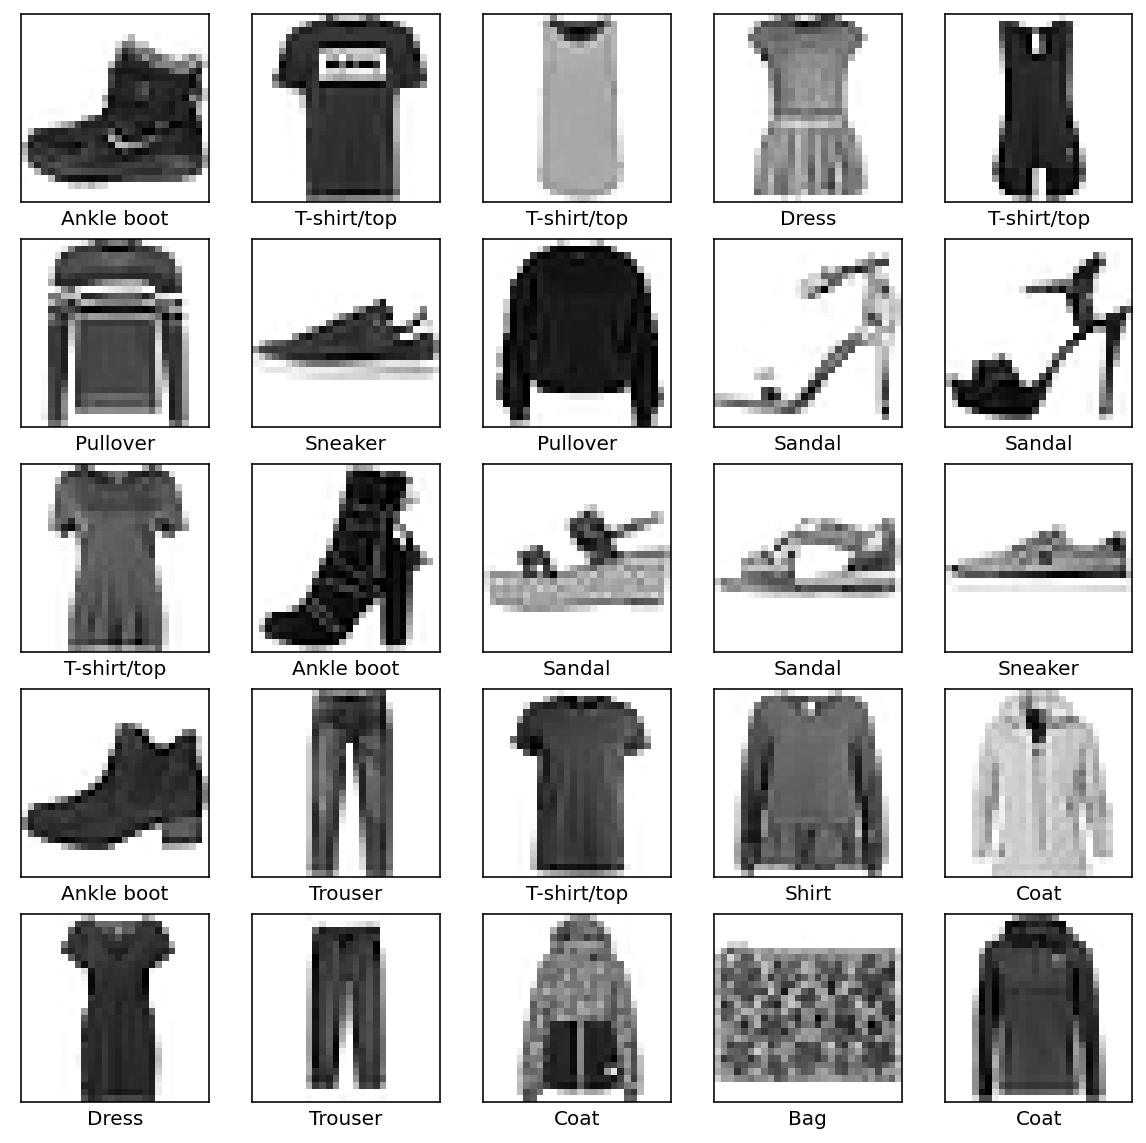

In [7]:
# посмотрим на варианты изображений с их метками
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [7]:

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2021-09-17 14:36:39.216973: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-17 14:36:39.221582: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-17 14:36:40.175453: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:927] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-09-17 14:36:40.175528: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce MX250 computeCapability: 6.1
coreClock: 1.0375GHz coreCount: 3 deviceMemorySize: 2.00GiB deviceMemoryBandwidth: 44.76GiB/s
2021-09-17 14:36:40.175577: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-09-17 14:36:40.199966: I tensorflow/stream_executor/platform/d

In [8]:
tf.debugging.set_log_device_placement(True)

# Place tensors on the CPU
with tf.device('/CPU:0'):
  a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# Run on the GPU
c = tf.matmul(a, b)
print(c)

2021-09-17 14:37:58.335009: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-17 14:37:58.337461: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:927] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-09-17 14:37:58.337506: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce MX250 computeCapability: 6.1
coreClock: 1.0375GHz coreCount: 3 deviceMemorySize: 2.00GiB deviceMemoryBandwidth: 44.76GiB/s
2021-09-17 14:37:58.337601: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library li

Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [10]:
# создаем нейронную сеть
input_ = keras.layers.Input(shape=(28, 28, 1)) # вход
x = keras.layers.Conv2D(14, (3, 3), activation='relu')(input_) # конволюционный слой
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Conv2D(8, (3, 3), activation='relu')(x)
x = keras.layers.Flatten()(x) # выпремляем данные
x = keras.layers.Dense(32, activation='relu')(x)
output_ = keras.layers.Dense(10)(x) # выход
           
model = keras.models.Model(input_, output_)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
E

In [16]:
import timeit

In [30]:

tf.debugging.set_log_device_placement(True)
trainX = train_images.reshape((train_images.shape[0], 28, 28, 1)) # изменим форму датасета для подачи в сеть
testX = test_images.reshape((test_images.shape[0], 28, 28, 1))
history = model.fit(trainX, train_labels, epochs=2) # тренируем сеть

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op M

2021-09-17 15:03:55.093798: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:03:55.093854: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:03:55.093863: I tensorflow/core/common_runtime/placer.cc:114] RandomShuffle: (RandomShuffle): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:03:55.093867: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:03:55.093870: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:03:55.093874: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:03:55.093878: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:C

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
  13/1875 [..............................] - ETA: 32s - loss: 0.1365 - accuracy: 0.9519Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
  18/1875 [..............................] - ETA: 29s - loss: 0.1389 - accuracy: 0.9531Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_fun

  84/1875 [>.............................] - ETA: 18s - loss: 0.1205 - accuracy: 0.9583Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
  90/1875 [>.............................] - ETA: 18s - loss: 0.1214 - accuracy: 0.9583Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_fun

 156/1875 [=>............................] - ETA: 16s - loss: 0.1304 - accuracy: 0.9527Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 162/1875 [=>............................] - ETA: 16s - loss: 0.1301 - accuracy: 0.9527Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_fun

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 232/1875 [==>...........................] - ETA: 16s - loss: 0.1208 - accuracy: 0.9564Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inferen

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 298/1875 [===>..........................] - ETA: 16s - loss: 0.1220 - accuracy: 0.9555Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 300/1875 [===>..........................] - ETA: 16s - loss: 0.1217 - accuracy: 0.9554Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 303/1875 [===>..........................] - ETA: 17s - loss: 0.1216 - accuracy: 0.9557Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 358/1875 [====>.........................] - ETA: 20s - loss: 0.1242 - accuracy: 0.9555Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 360/1875 [====>.........................] - ETA: 20s - loss: 0.1241 - accuracy: 0.9554Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 362/1875 [====>.........................] - ETA: 20s - loss: 0.1238 - accuracy: 0.9555Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 364/1875 [====>.........................] - E

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 416/1875 [=====>........................] - ETA: 23s - loss: 0.1238 - accuracy: 0.9557Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 418/1875 [=====>........................] - ETA: 23s - loss: 0.1236 - accuracy: 0.9558Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 420/1875 [=====>........................] - ETA: 23s - loss: 0.1233 - accuracy: 0.9560Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 422/1875 [=====>........................] - E

 473/1875 [======>.......................] - ETA: 24s - loss: 0.1264 - accuracy: 0.9547Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 475/1875 [======>.......................] - ETA: 24s - loss: 0.1263 - accuracy: 0.9547Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 477/1875 [======>.......................] - ETA: 24s - loss: 0.1262 - accuracy: 0.9548Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 480/1875 [======>.......................] - E

KeyboardInterrupt: 

In [32]:


device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    model.fit(trainX, train_labels, epochs=2) # тренируем сеть

def gpu():
  with tf.device('/device:GPU:0'):
    model.fit(trainX, train_labels, epochs=2) # тренируем сеть

  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=1, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=1, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0


2021-09-17 15:09:08.308490: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:927] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-09-17 15:09:08.309840: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce MX250 computeCapability: 6.1
coreClock: 1.0375GHz coreCount: 3 deviceMemorySize: 2.00GiB deviceMemoryBandwidth: 44.76GiB/s
2021-09-17 15:09:08.310078: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-09-17 15:09:08.310189: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2021-09-17 15:09:08.310265: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2021-09-17 15:09:08.310337: I tensorflow/stream_execut

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Execu

2021-09-17 15:09:09.286222: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:09:09.286387: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:09:09.286430: I tensorflow/core/common_runtime/placer.cc:114] RandomShuffle: (RandomShuffle): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:09:09.286455: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:09:09.286473: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:09:09.286494: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:09:09.286516: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:C

  20/1875 [..............................] - ETA: 3:02 - loss: 0.1031 - accuracy: 0.9578Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
  22/1875 [..............................] - ETA: 2:52 - loss: 0.0955 - accuracy: 0.9616Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
  25/1875 [..............................] - ETA: 2:41 - loss: 0.0892 - accuracy: 0.9650Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
  27/1875 [..............................] - ETA: 2:38 - loss: 0.0947 - accuracy: 0.9630Executing op __inference_train_function_714 in device 

  52/1875 [..............................] - ETA: 2:27 - loss: 0.1013 - accuracy: 0.9591Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
  55/1875 [..............................] - ETA: 2:25 - loss: 0.1021 - accuracy: 0.9580Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
  61/1875 [..............................] - ETA: 2:21 - loss: 0.1000 - accuracy: 0.9600Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
  92/1875 [>.............................] - ETA: 2:19 - loss: 0.0990 - accuracy: 0.9613Executing op __inference_train_function_714 in device 

 104/1875 [>.............................] - ETA: 2:18 - loss: 0.0983 - accuracy: 0.9615Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 133/1875 [=>............................] - ETA: 2:15 - loss: 0.1019 - accuracy: 0.9622Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 137/1875 [=>............................] - ETA: 2:15 - loss: 0.1029 - accuracy: 0.9624Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0


 158/1875 [=>............................] - ETA: 2:15 - loss: 0.1014 - accuracy: 0.9628Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 161/1875 [=>............................] - ETA: 2:13 - loss: 0.1023 - accuracy: 0.9627Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 165/1875 [=>............................] - ETA: 2:12 - loss: 0.1022 - accuracy: 0.9627Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 172/1875 [=>............................] - ETA: 2:11 - loss: 0.1026 - accuracy: 0.9624Executing op __inference_train_function_714 in device 

 195/1875 [==>...........................] - ETA: 2:06 - loss: 0.1055 - accuracy: 0.9607Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 198/1875 [==>...........................] - ETA: 2:05 - loss: 0.1059 - accuracy: 0.9604Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 200/1875 [==>...........................] - ETA: 2:04 - loss: 0.1062 - accuracy: 0.9603Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 202/1875 [==>...........................] - ETA: 2:04 - loss: 0.1072 - accuracy: 0.9599Executing op __inference_train_function_714 in device 

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 242/1875 [==>...........................] - ETA: 1:48 - loss: 0.1040 - accuracy: 0.9606Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 244/1875 [==>...........................] - ETA: 1:48 - loss: 0.1040 - accuracy: 0.9604Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 246/1875 [==>...........................] - ETA: 1:47 - loss: 0.1035 - accuracy: 0.9607Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 248/1875 [==>...........................] 

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 294/1875 [===>..........................] - ETA: 1:41 - loss: 0.1041 - accuracy: 0.9605Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 296/1875 [===>..........................] - ETA: 1:40 - loss: 0.1045 - accuracy: 0.9604Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 298/1875 [===>..........................] - ETA: 1:40 - loss: 0.1042 - accuracy: 0.9605Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 300/1875 [===>..........................] 

 350/1875 [====>.........................] - ETA: 1:29 - loss: 0.1045 - accuracy: 0.9604Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 352/1875 [====>.........................] - ETA: 1:29 - loss: 0.1044 - accuracy: 0.9604Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 354/1875 [====>.........................] - ETA: 1:28 - loss: 0.1041 - accuracy: 0.9605Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 356/1875 [====>.........................] - ETA: 1:28 - loss: 0.1041 - accuracy: 0.9605Executing op __inference_train_function_714 in device 

 409/1875 [=====>........................] - ETA: 1:19 - loss: 0.1030 - accuracy: 0.9607Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 411/1875 [=====>........................] - ETA: 1:19 - loss: 0.1034 - accuracy: 0.9605Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 413/1875 [=====>........................] - ETA: 1:18 - loss: 0.1036 - accuracy: 0.9604Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 415/1875 [=====>........................] - ETA: 1:18 - loss: 0.1040 - accuracy: 0.9604Executing op __inference_train_function_714 in device 

 470/1875 [======>.......................] - ETA: 1:10 - loss: 0.1039 - accuracy: 0.9602Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 472/1875 [======>.......................] - ETA: 1:10 - loss: 0.1042 - accuracy: 0.9599Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 474/1875 [======>.......................] - ETA: 1:10 - loss: 0.1044 - accuracy: 0.9598Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 476/1875 [======>.......................] - ETA: 1:09 - loss: 0.1043 - accuracy: 0.9598Executing op __inference_train_function_714 in device 

 532/1875 [=======>......................] - ETA: 1:03 - loss: 0.1045 - accuracy: 0.9597Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 535/1875 [=======>......................] - ETA: 1:03 - loss: 0.1045 - accuracy: 0.9598Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 538/1875 [=======>......................] - ETA: 1:02 - loss: 0.1043 - accuracy: 0.9599Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714

 594/1875 [========>.....................] - ETA: 57s - loss: 0.1048 - accuracy: 0.9596Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 596/1875 [========>.....................] - ETA: 57s - loss: 0.1050 - accuracy: 0.9596Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 598/1875 [========>.....................] - ETA: 57s - loss: 0.1050 - accuracy: 0.9597Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 600/1875 [========>.....................] - ETA: 56s - loss: 0.1052 - accuracy: 0.9596Executing op __inference_train_function_714 in device /job

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 651/1875 [=========>....................] - ETA: 53s - loss: 0.1059 - accuracy: 0.9595Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 653/1875 [=========>....................] - ETA: 53s - loss: 0.1058 - accuracy: 0.9596Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 655/1875 [=========>....................] - ETA: 53s - loss: 0.1064 - accuracy: 0.9594Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 657/1875 [=========>....................] - E

 712/1875 [==========>...................] - ETA: 49s - loss: 0.1063 - accuracy: 0.9595Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 715/1875 [==========>...................] - ETA: 49s - loss: 0.1063 - accuracy: 0.9595Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 718/1875 [==========>...................] - ETA: 48s - loss: 0.1060 - accuracy: 0.9597Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

 775/1875 [===========>..................] - ETA: 44s - loss: 0.1056 - accuracy: 0.9598Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 778/1875 [===========>..................] - ETA: 44s - loss: 0.1057 - accuracy: 0.9598Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 781/1875 [===========>..................] - ETA: 44s - loss: 0.1060 - accuracy: 0.9595Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

 839/1875 [============>.................] - ETA: 40s - loss: 0.1057 - accuracy: 0.9595Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 841/1875 [============>.................] - ETA: 40s - loss: 0.1057 - accuracy: 0.9595Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 844/1875 [============>.................] - ETA: 40s - loss: 0.1058 - accuracy: 0.9594Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 903/1875 [=============>................] - ETA: 37s - loss: 0.1054 - accuracy: 0.9595Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 906/1875 [=============>................] - ETA: 37s - loss: 0.1051 - accuracy: 0.9596Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 909/1875 [=============>.........

 966/1875 [==============>...............] - ETA: 33s - loss: 0.1060 - accuracy: 0.9592Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 969/1875 [==============>...............] - ETA: 33s - loss: 0.1060 - accuracy: 0.9592Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 972/1875 [==============>...............] - ETA: 33s - loss: 0.1058 - accuracy: 0.9593Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1032/1875 [===============>..............] - ETA: 30s - loss: 0.1063 - accuracy: 0.9595Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1035/1875 [===============>..............] - ETA: 30s - loss: 0.1062 - accuracy: 0.9595Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1038/1875 [===============>.......

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1096/1875 [================>.............] - ETA: 27s - loss: 0.1073 - accuracy: 0.9592Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1099/1875 [================>.............] - ETA: 27s - loss: 0.1072 - accuracy: 0.9592Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1102/1875 [================>......

1158/1875 [=================>............] - ETA: 24s - loss: 0.1071 - accuracy: 0.9593Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1161/1875 [=================>............] - ETA: 24s - loss: 0.1074 - accuracy: 0.9592Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1164/1875 [=================>............] - ETA: 24s - loss: 0.1074 - accuracy: 0.9592Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

1219/1875 [==================>...........] - ETA: 22s - loss: 0.1079 - accuracy: 0.9589Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1222/1875 [==================>...........] - ETA: 22s - loss: 0.1079 - accuracy: 0.9588Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1225/1875 [==================>...........] - ETA: 22s - loss: 0.1078 - accuracy: 0.9589Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1285/1875 [===================>..........] - ETA: 19s - loss: 0.1086 - accuracy: 0.9588Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1288/1875 [===================>..........] - ETA: 19s - loss: 0.1086 - accuracy: 0.9588Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1291/1875 [===================>...

1344/1875 [====================>.........] - ETA: 17s - loss: 0.1089 - accuracy: 0.9588Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1347/1875 [====================>.........] - ETA: 17s - loss: 0.1090 - accuracy: 0.9588Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1350/1875 [====================>.........] - ETA: 17s - loss: 0.1092 - accuracy: 0.9588Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1352/1875 [====================>.........] - ETA: 17s - loss: 0.1093 - accuracy: 0.9588Executing op __inference_train_function_714 in device /job

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1402/1875 [=====================>........] - ETA: 15s - loss: 0.1093 - accuracy: 0.9587Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1404/1875 [=====================>........] - ETA: 15s - loss: 0.1093 - accuracy: 0.9587Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1406/1875 [=====================>........] - ETA: 15s - loss: 0.1093 - accuracy: 0.9587Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1408/1875 [=====================>........] - E

1460/1875 [======================>.......] - ETA: 13s - loss: 0.1092 - accuracy: 0.9588Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1462/1875 [======================>.......] - ETA: 13s - loss: 0.1091 - accuracy: 0.9588Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1464/1875 [======================>.......] - ETA: 13s - loss: 0.1092 - accuracy: 0.9588Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1466/1875 [======================>.......] - ETA: 13s - loss: 0.1091 - accuracy: 0.9588Executing op __inference_train_function_714 in device /job

1522/1875 [=======================>......] - ETA: 11s - loss: 0.1094 - accuracy: 0.9587Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1525/1875 [=======================>......] - ETA: 11s - loss: 0.1093 - accuracy: 0.9587Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1528/1875 [=======================>......] - ETA: 11s - loss: 0.1093 - accuracy: 0.9587Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

1582/1875 [========================>.....] - ETA: 9s - loss: 0.1099 - accuracy: 0.9585Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1585/1875 [========================>.....] - ETA: 9s - loss: 0.1099 - accuracy: 0.9584Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1588/1875 [========================>.....] - ETA: 9s - loss: 0.1098 - accuracy: 0.9585Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in de

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1648/1875 [=========================>....] - ETA: 7s - loss: 0.1097 - accuracy: 0.9586Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1651/1875 [=========================>....] - ETA: 7s - loss: 0.1096 - accuracy: 0.9586Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1654/1875 [=========================

1711/1875 [==========================>...] - ETA: 5s - loss: 0.1104 - accuracy: 0.9583Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1714/1875 [==========================>...] - ETA: 5s - loss: 0.1104 - accuracy: 0.9583Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1717/1875 [==========================>...] - ETA: 5s - loss: 0.1105 - accuracy: 0.9582Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in de

1775/1875 [===========================>..] - ETA: 3s - loss: 0.1107 - accuracy: 0.9583Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1778/1875 [===========================>..] - ETA: 3s - loss: 0.1107 - accuracy: 0.9583Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1781/1875 [===========================>..] - ETA: 2s - loss: 0.1108 - accuracy: 0.9583Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in de

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1839/1875 [============================>.] - ETA: 1s - loss: 0.1111 - accuracy: 0.9584Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1841/1875 [============================>.] - ETA: 1s - loss: 0.1111 - accuracy: 0.9583Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1843/1875 [============================>.] - ETA: 0s - loss: 0.1111 - accuracy: 0.9583Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1845/1875 [============================>.] - ETA:

  22/1875 [..............................] - ETA: 40s - loss: 0.0819 - accuracy: 0.9744Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
  25/1875 [..............................] - ETA: 40s - loss: 0.0947 - accuracy: 0.9700Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
  28/1875 [..............................] - ETA: 40s - loss: 0.0957 - accuracy: 0.9699Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

  86/1875 [>.............................] - ETA: 39s - loss: 0.0968 - accuracy: 0.9666Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
  89/1875 [>.............................] - ETA: 39s - loss: 0.0946 - accuracy: 0.9677Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
  92/1875 [>.............................] - ETA: 39s - loss: 0.0950 - accuracy: 0.9674Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 151/1875 [=>............................] - ETA: 37s - loss: 0.1031 - accuracy: 0.9634Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 154/1875 [=>............................] - ETA: 36s - loss: 0.1023 - accuracy: 0.9637Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 156/1875 [=>............................] - ETA: 37s - loss: 0.1014 - accuracy: 0.9639Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 216/1875 [==>...........................] - ETA: 35s - loss: 0.1000 - accuracy: 0.9643Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 219/1875 [==>...........................] - ETA: 35s - loss: 0.1004 - accuracy: 0.9640Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 222/1875 [==>....................

 279/1875 [===>..........................] - ETA: 33s - loss: 0.0985 - accuracy: 0.9647Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 282/1875 [===>..........................] - ETA: 33s - loss: 0.0985 - accuracy: 0.9648Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 285/1875 [===>..........................] - ETA: 33s - loss: 0.0986 - accuracy: 0.9647Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 345/1875 [====>.........................] - ETA: 32s - loss: 0.0964 - accuracy: 0.9653Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 348/1875 [====>.........................] - ETA: 32s - loss: 0.0964 - accuracy: 0.9654Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 351/1875 [====>..................

 408/1875 [=====>........................] - ETA: 30s - loss: 0.0982 - accuracy: 0.9645Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 411/1875 [=====>........................] - ETA: 30s - loss: 0.0979 - accuracy: 0.9646Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 414/1875 [=====>........................] - ETA: 30s - loss: 0.0978 - accuracy: 0.9647Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 472/1875 [======>.......................] - ETA: 29s - loss: 0.0971 - accuracy: 0.9648Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 475/1875 [======>.......................] - ETA: 29s - loss: 0.0968 - accuracy: 0.9651Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 478/1875 [======>.......................] - ETA: 29s - loss: 0.0972 - accuracy: 0.9648Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 537/1875 [=======>......................] - ETA: 28s - loss: 0.0993 - accuracy: 0.9639Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 540/1875 [=======>......................] - ETA: 28s - loss: 0.0992 - accuracy: 0.9639Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 543/1875 [=======>...............

 600/1875 [========>.....................] - ETA: 27s - loss: 0.1000 - accuracy: 0.9631Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 603/1875 [========>.....................] - ETA: 27s - loss: 0.0999 - accuracy: 0.9631Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 606/1875 [========>.....................] - ETA: 27s - loss: 0.0996 - accuracy: 0.9632Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 666/1875 [=========>....................] - ETA: 25s - loss: 0.1001 - accuracy: 0.9631Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 669/1875 [=========>....................] - ETA: 25s - loss: 0.1002 - accuracy: 0.9631Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 671/1875 [=========>....................] - ETA: 25s - loss: 0.1007 - accuracy: 0.9630Executing op __inference_train_function_714 in

 724/1875 [==========>...................] - ETA: 24s - loss: 0.1013 - accuracy: 0.9628Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 726/1875 [==========>...................] - ETA: 24s - loss: 0.1012 - accuracy: 0.9628Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 728/1875 [==========>...................] - ETA: 24s - loss: 0.1013 - accuracy: 0.9627Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 731/1875 [==========>...................] - E

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 779/1875 [===========>..................] - ETA: 25s - loss: 0.1013 - accuracy: 0.9627Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 781/1875 [===========>..................] - ETA: 25s - loss: 0.1011 - accuracy: 0.9627Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 783/1875 [===========>..................] - ETA: 25s - loss: 0.1012 - accuracy: 0.9628Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 785/1875 [===========>..................] - E

 835/1875 [============>.................] - ETA: 25s - loss: 0.1029 - accuracy: 0.9619Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 837/1875 [============>.................] - ETA: 25s - loss: 0.1031 - accuracy: 0.9618Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 839/1875 [============>.................] - ETA: 25s - loss: 0.1030 - accuracy: 0.9619Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 841/1875 [============>.................] - ETA: 25s - loss: 0.1030 - accuracy: 0.9619Executing op __inference_train_function_714 in device /job

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 897/1875 [=============>................] - ETA: 23s - loss: 0.1028 - accuracy: 0.9620Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 899/1875 [=============>................] - ETA: 23s - loss: 0.1027 - accuracy: 0.9620Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 901/1875 [=============>................] - ETA: 23s - loss: 0.1026 - accuracy: 0.9620Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

 955/1875 [==============>...............] - ETA: 22s - loss: 0.1034 - accuracy: 0.9617Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 958/1875 [==============>...............] - ETA: 22s - loss: 0.1033 - accuracy: 0.9618Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 960/1875 [==============>...............] - ETA: 22s - loss: 0.1032 - accuracy: 0.9618Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 962/1875 [==============>...............] - E

1013/1875 [===============>..............] - ETA: 21s - loss: 0.1029 - accuracy: 0.9619Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1015/1875 [===============>..............] - ETA: 21s - loss: 0.1028 - accuracy: 0.9620Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1017/1875 [===============>..............] - ETA: 21s - loss: 0.1028 - accuracy: 0.9620Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1019/1875 [===============>..............] - ETA: 21s - loss: 0.1028 - accuracy: 0.9619Executing op __inference_train_function_714 in device /job

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1074/1875 [================>.............] - ETA: 20s - loss: 0.1032 - accuracy: 0.9617Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1076/1875 [================>.............] - ETA: 19s - loss: 0.1031 - accuracy: 0.9617Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1078/1875 [================>.............] - ETA: 19s - loss: 0.1031 - accuracy: 0.9617Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1135/1875 [=================>............] - ETA: 18s - loss: 0.1041 - accuracy: 0.9613Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1137/1875 [=================>............] - ETA: 18s - loss: 0.1040 - accuracy: 0.9612Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1139/1875 [=================>............] - ETA: 18s - loss: 0.1041 - accuracy: 0.9612Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

1193/1875 [==================>...........] - ETA: 17s - loss: 0.1049 - accuracy: 0.9609Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1195/1875 [==================>...........] - ETA: 17s - loss: 0.1048 - accuracy: 0.9609Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1197/1875 [==================>...........] - ETA: 17s - loss: 0.1048 - accuracy: 0.9609Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1199/1875 [==================>...........] - ETA: 16s - loss: 0.1048 - accuracy: 0.9609Executing op __inference_train_function_714 in device /job

1256/1875 [===================>..........] - ETA: 15s - loss: 0.1048 - accuracy: 0.9607Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1259/1875 [===================>..........] - ETA: 15s - loss: 0.1048 - accuracy: 0.9607Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1261/1875 [===================>..........] - ETA: 15s - loss: 0.1048 - accuracy: 0.9607Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1263/1875 [===================>..........] - E

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1317/1875 [====================>.........] - ETA: 13s - loss: 0.1050 - accuracy: 0.9605Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1320/1875 [====================>.........] - ETA: 13s - loss: 0.1049 - accuracy: 0.9605Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1322/1875 [====================>.........] - ETA: 13s - loss: 0.1049 - accuracy: 0.9605Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

1378/1875 [=====================>........] - ETA: 12s - loss: 0.1061 - accuracy: 0.9600Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1381/1875 [=====================>........] - ETA: 12s - loss: 0.1060 - accuracy: 0.9600Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1384/1875 [=====================>........] - ETA: 12s - loss: 0.1061 - accuracy: 0.9599Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1442/1875 [======================>.......] - ETA: 10s - loss: 0.1063 - accuracy: 0.9599Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1444/1875 [======================>.......] - ETA: 10s - loss: 0.1063 - accuracy: 0.9599Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1447/1875 [======================>.......] - ETA: 10s - loss: 0.1062 - accuracy: 0.9599Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1449/1875 [======================>.......] - E

1498/1875 [======================>.......] - ETA: 9s - loss: 0.1064 - accuracy: 0.9597Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1500/1875 [=======================>......] - ETA: 9s - loss: 0.1065 - accuracy: 0.9596Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1503/1875 [=======================>......] - ETA: 9s - loss: 0.1067 - accuracy: 0.9596Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1505/1875 [=======================>......] - ETA:

1560/1875 [=======================>......] - ETA: 7s - loss: 0.1072 - accuracy: 0.9594Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1563/1875 [========================>.....] - ETA: 7s - loss: 0.1072 - accuracy: 0.9594Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1566/1875 [========================>.....] - ETA: 7s - loss: 0.1073 - accuracy: 0.9593Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in de

1620/1875 [========================>.....] - ETA: 6s - loss: 0.1068 - accuracy: 0.9592Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1622/1875 [========================>.....] - ETA: 6s - loss: 0.1068 - accuracy: 0.9593Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1624/1875 [========================>.....] - ETA: 6s - loss: 0.1068 - accuracy: 0.9592Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1626/1875 [=========================>....] - ETA: 6s - loss: 0.1068 - accuracy: 0.9593Executing op __inference_train_function_714 in device /job:loc

1677/1875 [=========================>....] - ETA: 5s - loss: 0.1063 - accuracy: 0.9596Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1679/1875 [=========================>....] - ETA: 5s - loss: 0.1065 - accuracy: 0.9595Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1682/1875 [=========================>....] - ETA: 4s - loss: 0.1066 - accuracy: 0.9595Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in de

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1741/1875 [==========================>...] - ETA: 3s - loss: 0.1070 - accuracy: 0.9594Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1744/1875 [==========================>...] - ETA: 3s - loss: 0.1070 - accuracy: 0.9595Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1747/1875 [==========================>...] - ETA: 3s - loss: 0.1070 - accuracy: 0.9594Executing op __inference_train_function_714 in de

1804/1875 [===========================>..] - ETA: 1s - loss: 0.1076 - accuracy: 0.9591Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1807/1875 [===========================>..] - ETA: 1s - loss: 0.1077 - accuracy: 0.9591Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1810/1875 [===========================>..] - ETA: 1s - loss: 0.1078 - accuracy: 0.9590Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in de

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1868/1875 [============================>.] - ETA: 0s - loss: 0.1078 - accuracy: 0.9591Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1871/1875 [============================>.] - ETA: 0s - loss: 0.1079 - accuracy: 0.9591Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1080 - accuracy: 0.9592
Executing op DeleteIterator in device /job

2021-09-17 15:10:55.420724: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:10:55.420819: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:10:55.420847: I tensorflow/core/common_runtime/placer.cc:114] RandomShuffle: (RandomShuffle): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:10:55.420863: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:10:55.420876: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:10:55.420891: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:10:55.420905: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:C

   6/1875 [..............................] - ETA: 1:01 - loss: 0.1157 - accuracy: 0.9479Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
   8/1875 [..............................] - ETA: 1:02 - loss: 0.0999 - accuracy: 0.9570Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
  10/1875 [..............................] - ETA: 59s - loss: 0.1032 - accuracy: 0.9625 Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
  13/1875 [..............................] 

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
  68/1875 [>.............................] - ETA: 47s - loss: 0.0944 - accuracy: 0.9665Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
  70/1875 [>.............................] - ETA: 47s - loss: 0.0936 - accuracy: 0.9665Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
  72/1875 [>.............................] - ETA: 47s - loss: 0.0929 - accuracy: 0.9666Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
  74/1875 [>.............................] - E

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 132/1875 [=>............................] - ETA: 42s - loss: 0.0943 - accuracy: 0.9652Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 135/1875 [=>............................] - ETA: 42s - loss: 0.0954 - accuracy: 0.9648Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 138/1875 [=>.....................

 195/1875 [==>...........................] - ETA: 38s - loss: 0.0978 - accuracy: 0.9638Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 198/1875 [==>...........................] - ETA: 38s - loss: 0.0984 - accuracy: 0.9634Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 201/1875 [==>...........................] - ETA: 38s - loss: 0.0977 - accuracy: 0.9638Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 261/1875 [===>..........................] - ETA: 36s - loss: 0.0968 - accuracy: 0.9635Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 264/1875 [===>..........................] - ETA: 36s - loss: 0.0973 - accuracy: 0.9632Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 267/1875 [===>...................

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 325/1875 [====>.........................] - ETA: 34s - loss: 0.0988 - accuracy: 0.9624Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 328/1875 [====>.........................] - ETA: 34s - loss: 0.0990 - accuracy: 0.9623Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 331/1875 [====>..................

 388/1875 [=====>........................] - ETA: 33s - loss: 0.0990 - accuracy: 0.9629Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 391/1875 [=====>........................] - ETA: 33s - loss: 0.0991 - accuracy: 0.9628Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 394/1875 [=====>........................] - ETA: 32s - loss: 0.0994 - accuracy: 0.9629Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 454/1875 [======>.......................] - ETA: 31s - loss: 0.1011 - accuracy: 0.9626Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 457/1875 [======>.......................] - ETA: 31s - loss: 0.1015 - accuracy: 0.9626Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 460/1875 [======>................

 517/1875 [=======>......................] - ETA: 29s - loss: 0.1012 - accuracy: 0.9625Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 520/1875 [=======>......................] - ETA: 29s - loss: 0.1010 - accuracy: 0.9626Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 523/1875 [=======>......................] - ETA: 29s - loss: 0.1007 - accuracy: 0.9627Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 583/1875 [========>.....................] - ETA: 28s - loss: 0.1018 - accuracy: 0.9624Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 586/1875 [========>.....................] - ETA: 28s - loss: 0.1017 - accuracy: 0.9625Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 589/1875 [========>..............

 646/1875 [=========>....................] - ETA: 26s - loss: 0.1011 - accuracy: 0.9628Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 649/1875 [=========>....................] - ETA: 26s - loss: 0.1014 - accuracy: 0.9626Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 652/1875 [=========>....................] - ETA: 26s - loss: 0.1015 - accuracy: 0.9626Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 712/1875 [==========>...................] - ETA: 25s - loss: 0.1014 - accuracy: 0.9626Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 715/1875 [==========>...................] - ETA: 25s - loss: 0.1017 - accuracy: 0.9624Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 718/1875 [==========>............

 775/1875 [===========>..................] - ETA: 23s - loss: 0.1009 - accuracy: 0.9625Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 778/1875 [===========>..................] - ETA: 23s - loss: 0.1010 - accuracy: 0.9626Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 781/1875 [===========>..................] - ETA: 23s - loss: 0.1009 - accuracy: 0.9626Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 841/1875 [============>.................] - ETA: 22s - loss: 0.1003 - accuracy: 0.9622Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 844/1875 [============>.................] - ETA: 22s - loss: 0.1004 - accuracy: 0.9622Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 847/1875 [============>..........

 904/1875 [=============>................] - ETA: 21s - loss: 0.0998 - accuracy: 0.9626Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 907/1875 [=============>................] - ETA: 21s - loss: 0.1000 - accuracy: 0.9625Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 910/1875 [=============>................] - ETA: 21s - loss: 0.0999 - accuracy: 0.9625Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 970/1875 [==============>...............] - ETA: 19s - loss: 0.1010 - accuracy: 0.9618Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 973/1875 [==============>...............] - ETA: 19s - loss: 0.1010 - accuracy: 0.9617Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 976/1875 [==============>........

1033/1875 [===============>..............] - ETA: 18s - loss: 0.1015 - accuracy: 0.9614Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1036/1875 [===============>..............] - ETA: 18s - loss: 0.1016 - accuracy: 0.9614Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1039/1875 [===============>..............] - ETA: 18s - loss: 0.1020 - accuracy: 0.9613Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1099/1875 [================>.............] - ETA: 16s - loss: 0.1020 - accuracy: 0.9614Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1102/1875 [================>.............] - ETA: 16s - loss: 0.1021 - accuracy: 0.9613Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1105/1875 [================>......

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1163/1875 [=================>............] - ETA: 15s - loss: 0.1028 - accuracy: 0.9613Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1166/1875 [=================>............] - ETA: 15s - loss: 0.1027 - accuracy: 0.9613Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1169/1875 [=================>.....

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1223/1875 [==================>...........] - ETA: 14s - loss: 0.1023 - accuracy: 0.9612Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1226/1875 [==================>...........] - ETA: 14s - loss: 0.1023 - accuracy: 0.9612Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1229/1875 [==================>...........] - ETA: 14s - loss: 0.1022 - accuracy: 0.9613Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1286/1875 [===================>..........] - ETA: 13s - loss: 0.1021 - accuracy: 0.9614Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1289/1875 [===================>..........] - ETA: 12s - loss: 0.1019 - accuracy: 0.9614Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1292/1875 [===================>...

1344/1875 [====================>.........] - ETA: 11s - loss: 0.1019 - accuracy: 0.9614Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1347/1875 [====================>.........] - ETA: 11s - loss: 0.1020 - accuracy: 0.9613Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1350/1875 [====================>.........] - ETA: 11s - loss: 0.1019 - accuracy: 0.9614Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in

1404/1875 [=====================>........] - ETA: 10s - loss: 0.1023 - accuracy: 0.9614Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1407/1875 [=====================>........] - ETA: 10s - loss: 0.1021 - accuracy: 0.9614Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1409/1875 [=====================>........] - ETA: 10s - loss: 0.1021 - accuracy: 0.9615Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1411/1875 [=====================>........] - E

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1469/1875 [======================>.......] - ETA: 9s - loss: 0.1026 - accuracy: 0.9613Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1472/1875 [======================>.......] - ETA: 9s - loss: 0.1026 - accuracy: 0.9613Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1475/1875 [======================>..

1529/1875 [=======================>......] - ETA: 7s - loss: 0.1026 - accuracy: 0.9613Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1532/1875 [=======================>......] - ETA: 7s - loss: 0.1029 - accuracy: 0.9612Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1535/1875 [=======================>......] - ETA: 7s - loss: 0.1030 - accuracy: 0.9612Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in de

1592/1875 [========================>.....] - ETA: 6s - loss: 0.1037 - accuracy: 0.9611Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1595/1875 [========================>.....] - ETA: 6s - loss: 0.1036 - accuracy: 0.9611Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1598/1875 [========================>.....] - ETA: 6s - loss: 0.1035 - accuracy: 0.9611Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in de

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1658/1875 [=========================>....] - ETA: 4s - loss: 0.1036 - accuracy: 0.9611Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1661/1875 [=========================>....] - ETA: 4s - loss: 0.1035 - accuracy: 0.9611Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1664/1875 [=========================

1721/1875 [==========================>...] - ETA: 3s - loss: 0.1037 - accuracy: 0.9611Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1724/1875 [==========================>...] - ETA: 3s - loss: 0.1037 - accuracy: 0.9610Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1727/1875 [==========================>...] - ETA: 3s - loss: 0.1036 - accuracy: 0.9611Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in de

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1787/1875 [===========================>..] - ETA: 1s - loss: 0.1042 - accuracy: 0.9609Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1790/1875 [===========================>..] - ETA: 1s - loss: 0.1041 - accuracy: 0.9610Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1793/1875 [=========================

1850/1875 [============================>.] - ETA: 0s - loss: 0.1045 - accuracy: 0.9608Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1853/1875 [============================>.] - ETA: 0s - loss: 0.1047 - accuracy: 0.9607Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1856/1875 [============================>.] - ETA: 0s - loss: 0.1049 - accuracy: 0.9606Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in de

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
  37/1875 [..............................] - ETA: 38s - loss: 0.0968 - accuracy: 0.9637Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
  40/1875 [..............................] - ETA: 38s - loss: 0.0954 - accuracy: 0.9641Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
  43/1875 [.......................

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
  99/1875 [>.............................] - ETA: 41s - loss: 0.0910 - accuracy: 0.9646Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 102/1875 [>.............................] - ETA: 41s - loss: 0.0911 - accuracy: 0.9642Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 105/1875 [>......................

 162/1875 [=>............................] - ETA: 39s - loss: 0.0873 - accuracy: 0.9657Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 165/1875 [=>............................] - ETA: 39s - loss: 0.0877 - accuracy: 0.9657Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 168/1875 [=>............................] - ETA: 39s - loss: 0.0876 - accuracy: 0.9658Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 228/1875 [==>...........................] - ETA: 37s - loss: 0.0893 - accuracy: 0.9656Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 231/1875 [==>...........................] - ETA: 37s - loss: 0.0893 - accuracy: 0.9656Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 234/1875 [==>....................

 291/1875 [===>..........................] - ETA: 35s - loss: 0.0932 - accuracy: 0.9643Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 294/1875 [===>..........................] - ETA: 35s - loss: 0.0931 - accuracy: 0.9643Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 297/1875 [===>..........................] - ETA: 35s - loss: 0.0948 - accuracy: 0.9639Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 357/1875 [====>.........................] - ETA: 33s - loss: 0.0928 - accuracy: 0.9647Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 360/1875 [====>.........................] - ETA: 33s - loss: 0.0929 - accuracy: 0.9647Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 363/1875 [====>..................

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 419/1875 [=====>........................] - ETA: 32s - loss: 0.0931 - accuracy: 0.9643Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 421/1875 [=====>........................] - ETA: 32s - loss: 0.0930 - accuracy: 0.9643Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 423/1875 [=====>........................] - ETA: 32s - loss: 0.0933 - accuracy: 0.9641Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 425/1875 [=====>........................] - E

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 482/1875 [======>.......................] - ETA: 31s - loss: 0.0937 - accuracy: 0.9643Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 485/1875 [======>.......................] - ETA: 31s - loss: 0.0933 - accuracy: 0.9645Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 488/1875 [======>.......................] - ETA: 31s - loss: 0.0935 - accuracy: 0.9644Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 547/1875 [=======>......................] - ETA: 30s - loss: 0.0953 - accuracy: 0.9640Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 550/1875 [=======>......................] - ETA: 29s - loss: 0.0951 - accuracy: 0.9641Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 553/1875 [=======>...............

 610/1875 [========>.....................] - ETA: 28s - loss: 0.0945 - accuracy: 0.9643Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 613/1875 [========>.....................] - ETA: 28s - loss: 0.0943 - accuracy: 0.9644Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 616/1875 [========>.....................] - ETA: 28s - loss: 0.0944 - accuracy: 0.9644Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 676/1875 [=========>....................] - ETA: 26s - loss: 0.0960 - accuracy: 0.9642Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 679/1875 [=========>....................] - ETA: 26s - loss: 0.0969 - accuracy: 0.9639Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 681/1875 [=========>....................] - ETA: 26s - loss: 0.0968 - accuracy: 0.9639Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 738/1875 [==========>...................] - ETA: 25s - loss: 0.0970 - accuracy: 0.9641Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 740/1875 [==========>...................] - ETA: 25s - loss: 0.0972 - accuracy: 0.9640Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 742/1875 [==========>...................] - ETA: 25s - loss: 0.0972 - accuracy: 0.9641Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in

 793/1875 [===========>..................] - ETA: 25s - loss: 0.0968 - accuracy: 0.9641Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 795/1875 [===========>..................] - ETA: 25s - loss: 0.0969 - accuracy: 0.9642Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 797/1875 [===========>..................] - ETA: 25s - loss: 0.0970 - accuracy: 0.9640Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 799/1875 [===========>..................] - ETA: 25s - loss: 0.0970 - accuracy: 0.9641Executing op __inference_train_function_714 in device /job

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 849/1875 [============>.................] - ETA: 25s - loss: 0.0967 - accuracy: 0.9639Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 851/1875 [============>.................] - ETA: 25s - loss: 0.0968 - accuracy: 0.9639Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 853/1875 [============>.................] - ETA: 25s - loss: 0.0968 - accuracy: 0.9640Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 855/1875 [============>.................] - E

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 907/1875 [=============>................] - ETA: 24s - loss: 0.0968 - accuracy: 0.9639Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 909/1875 [=============>................] - ETA: 24s - loss: 0.0967 - accuracy: 0.9640Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 911/1875 [=============>................] - ETA: 24s - loss: 0.0966 - accuracy: 0.9640Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 913/1875 [=============>................] - E

 966/1875 [==============>...............] - ETA: 22s - loss: 0.0960 - accuracy: 0.9643Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 968/1875 [==============>...............] - ETA: 22s - loss: 0.0959 - accuracy: 0.9643Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 971/1875 [==============>...............] - ETA: 22s - loss: 0.0959 - accuracy: 0.9643Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 973/1875 [==============>...............] - E

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1027/1875 [===============>..............] - ETA: 21s - loss: 0.0964 - accuracy: 0.9642Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1029/1875 [===============>..............] - ETA: 21s - loss: 0.0962 - accuracy: 0.9642Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1031/1875 [===============>..............] - ETA: 21s - loss: 0.0963 - accuracy: 0.9642Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1033/1875 [===============>..............] - E

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1088/1875 [================>.............] - ETA: 19s - loss: 0.0960 - accuracy: 0.9643Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1091/1875 [================>.............] - ETA: 19s - loss: 0.0959 - accuracy: 0.9643Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1094/1875 [================>......

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1149/1875 [=================>............] - ETA: 18s - loss: 0.0972 - accuracy: 0.9637Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1152/1875 [=================>............] - ETA: 18s - loss: 0.0972 - accuracy: 0.9637Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1155/1875 [=================>............] - ETA: 18s - loss: 0.0971 - accuracy: 0.9638Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1214/1875 [==================>...........] - ETA: 16s - loss: 0.0977 - accuracy: 0.9633Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1217/1875 [==================>...........] - ETA: 16s - loss: 0.0976 - accuracy: 0.9634Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1220/1875 [==================>....

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1276/1875 [===================>..........] - ETA: 14s - loss: 0.0979 - accuracy: 0.9632Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1279/1875 [===================>..........] - ETA: 14s - loss: 0.0984 - accuracy: 0.9631Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1281/1875 [===================>..........] - ETA: 14s - loss: 0.0983 - accuracy: 0.9631Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1340/1875 [====================>.........] - ETA: 13s - loss: 0.0984 - accuracy: 0.9629Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1343/1875 [====================>.........] - ETA: 13s - loss: 0.0984 - accuracy: 0.9629Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1346/1875 [====================>..

1403/1875 [=====================>........] - ETA: 11s - loss: 0.0992 - accuracy: 0.9627Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1406/1875 [=====================>........] - ETA: 11s - loss: 0.0992 - accuracy: 0.9627Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1409/1875 [=====================>........] - ETA: 11s - loss: 0.0992 - accuracy: 0.9627Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1465/1875 [======================>.......] - ETA: 10s - loss: 0.0996 - accuracy: 0.9626Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1468/1875 [======================>.......] - ETA: 10s - loss: 0.0997 - accuracy: 0.9625Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1470/1875 [======================>.......] - ETA: 10s - loss: 0.0998 - accuracy: 0.9625Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1530/1875 [=======================>......] - ETA: 8s - loss: 0.0997 - accuracy: 0.9625Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1533/1875 [=======================>......] - ETA: 8s - loss: 0.0997 - accuracy: 0.9625Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1536/1875 [=======================>.

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1594/1875 [========================>.....] - ETA: 6s - loss: 0.1006 - accuracy: 0.9622Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1597/1875 [========================>.....] - ETA: 6s - loss: 0.1006 - accuracy: 0.9622Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1600/1875 [========================>

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1658/1875 [=========================>....] - ETA: 5s - loss: 0.1008 - accuracy: 0.9621Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1661/1875 [=========================>....] - ETA: 5s - loss: 0.1008 - accuracy: 0.9621Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1663/1875 [=========================>....] - ETA: 5s - loss: 0.1008 - accuracy: 0.9621Executing op __inference_train_function_714 in de

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1722/1875 [==========================>...] - ETA: 3s - loss: 0.1010 - accuracy: 0.9619Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1725/1875 [==========================>...] - ETA: 3s - loss: 0.1010 - accuracy: 0.9619Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1728/1875 [=========================

1785/1875 [===========================>..] - ETA: 2s - loss: 0.1009 - accuracy: 0.9619Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1788/1875 [===========================>..] - ETA: 2s - loss: 0.1010 - accuracy: 0.9619Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1791/1875 [===========================>..] - ETA: 2s - loss: 0.1010 - accuracy: 0.9619Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in de

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1851/1875 [============================>.] - ETA: 0s - loss: 0.1007 - accuracy: 0.9622Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1854/1875 [============================>.] - ETA: 0s - loss: 0.1007 - accuracy: 0.9622Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1857/1875 [=========================

2021-09-17 15:12:23.481769: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:12:23.481866: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:12:23.481892: I tensorflow/core/common_runtime/placer.cc:114] RandomShuffle: (RandomShuffle): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:12:23.481907: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:12:23.481919: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:12:23.481933: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:12:23.481946: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:C

  10/1875 [..............................] - ETA: 32s - loss: 0.0750 - accuracy: 0.9844Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
  13/1875 [..............................] - ETA: 32s - loss: 0.0904 - accuracy: 0.9688Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
  16/1875 [..............................] - ETA: 32s - loss: 0.0931 - accuracy: 0.9668Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
  76/1875 [>.............................] - ETA: 34s - loss: 0.0914 - accuracy: 0.9663Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
  79/1875 [>.............................] - ETA: 34s - loss: 0.0918 - accuracy: 0.9668Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
  82/1875 [>......................

 137/1875 [=>............................] - ETA: 35s - loss: 0.0873 - accuracy: 0.9681Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 139/1875 [=>............................] - ETA: 35s - loss: 0.0868 - accuracy: 0.9683Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 142/1875 [=>............................] - ETA: 35s - loss: 0.0858 - accuracy: 0.9690Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 199/1875 [==>...........................] - ETA: 36s - loss: 0.0915 - accuracy: 0.9673Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 202/1875 [==>...........................] - ETA: 36s - loss: 0.0921 - accuracy: 0.9674Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 205/1875 [==>...........................] - ETA: 36s - loss: 0.0921 - accuracy: 0.9674Executing op __inference_train_function_714 in

 262/1875 [===>..........................] - ETA: 35s - loss: 0.0963 - accuracy: 0.9655Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 265/1875 [===>..........................] - ETA: 35s - loss: 0.0964 - accuracy: 0.9651Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 267/1875 [===>..........................] - ETA: 35s - loss: 0.0971 - accuracy: 0.9649Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 325/1875 [====>.........................] - ETA: 34s - loss: 0.0965 - accuracy: 0.9660Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 328/1875 [====>.........................] - ETA: 34s - loss: 0.0960 - accuracy: 0.9661Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 331/1875 [====>..................

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 383/1875 [=====>........................] - ETA: 35s - loss: 0.0964 - accuracy: 0.9663Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 385/1875 [=====>........................] - ETA: 35s - loss: 0.0962 - accuracy: 0.9663Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 387/1875 [=====>........................] - ETA: 35s - loss: 0.0962 - accuracy: 0.9662Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 389/1875 [=====>........................] - E

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 445/1875 [======>.......................] - ETA: 34s - loss: 0.0937 - accuracy: 0.9666Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 448/1875 [======>.......................] - ETA: 33s - loss: 0.0935 - accuracy: 0.9667Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 451/1875 [======>.......................] - ETA: 33s - loss: 0.0931 - accuracy: 0.9669Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 510/1875 [=======>......................] - ETA: 32s - loss: 0.0936 - accuracy: 0.9662Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 513/1875 [=======>......................] - ETA: 32s - loss: 0.0936 - accuracy: 0.9661Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 516/1875 [=======>...............

 572/1875 [========>.....................] - ETA: 30s - loss: 0.0939 - accuracy: 0.9656Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 575/1875 [========>.....................] - ETA: 30s - loss: 0.0938 - accuracy: 0.9656Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 578/1875 [========>.....................] - ETA: 30s - loss: 0.0940 - accuracy: 0.9655Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

 634/1875 [=========>....................] - ETA: 29s - loss: 0.0940 - accuracy: 0.9653Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 638/1875 [=========>....................] - ETA: 29s - loss: 0.0942 - accuracy: 0.9651Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 640/1875 [=========>....................] - ETA: 29s - loss: 0.0942 - accuracy: 0.9651Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 642/1875 [=========>....................] - ETA: 29s - loss: 0.0939 - accuracy: 0.9652Executing op __inference_train_function_714 in device /job

 689/1875 [==========>...................] - ETA: 29s - loss: 0.0948 - accuracy: 0.9648Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 691/1875 [==========>...................] - ETA: 29s - loss: 0.0953 - accuracy: 0.9647Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 693/1875 [==========>...................] - ETA: 29s - loss: 0.0953 - accuracy: 0.9646Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 696/1875 [==========>...................] - E

 752/1875 [===========>..................] - ETA: 27s - loss: 0.0968 - accuracy: 0.9642Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 755/1875 [===========>..................] - ETA: 27s - loss: 0.0967 - accuracy: 0.9641Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 758/1875 [===========>..................] - ETA: 27s - loss: 0.0966 - accuracy: 0.9642Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 817/1875 [============>.................] - ETA: 25s - loss: 0.0963 - accuracy: 0.9644Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 820/1875 [============>.................] - ETA: 25s - loss: 0.0962 - accuracy: 0.9644Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 823/1875 [============>.................] - ETA: 25s - loss: 0.0963 - accuracy: 0.9643Executing op __inference_train_function_714 in

 877/1875 [=============>................] - ETA: 24s - loss: 0.0964 - accuracy: 0.9640Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 879/1875 [=============>................] - ETA: 24s - loss: 0.0965 - accuracy: 0.9640Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 881/1875 [=============>................] - ETA: 24s - loss: 0.0966 - accuracy: 0.9639Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 886/1875 [=============>................] - ETA: 24s - loss: 0.0962 - accuracy: 0.9641Executing op __inference_train_function_714 in device /job

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 935/1875 [=============>................] - ETA: 23s - loss: 0.0962 - accuracy: 0.9642Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 937/1875 [=============>................] - ETA: 23s - loss: 0.0961 - accuracy: 0.9642Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 939/1875 [==============>...............] - ETA: 23s - loss: 0.0961 - accuracy: 0.9643Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 941/1875 [==============>...............] - E

 995/1875 [==============>...............] - ETA: 21s - loss: 0.0964 - accuracy: 0.9641Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 998/1875 [==============>...............] - ETA: 21s - loss: 0.0969 - accuracy: 0.9640Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1003/1875 [===============>..............] - ETA: 21s - loss: 0.0970 - accuracy: 0.9639Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1005/1875 [===============>..............] - E

1055/1875 [===============>..............] - ETA: 20s - loss: 0.0979 - accuracy: 0.9636Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1058/1875 [===============>..............] - ETA: 20s - loss: 0.0979 - accuracy: 0.9636Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1061/1875 [===============>..............] - ETA: 20s - loss: 0.0978 - accuracy: 0.9636Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1120/1875 [================>.............] - ETA: 18s - loss: 0.0980 - accuracy: 0.9635Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1123/1875 [================>.............] - ETA: 18s - loss: 0.0979 - accuracy: 0.9635Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1126/1875 [=================>............] - ETA: 18s - loss: 0.0980 - accuracy: 0.9635Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1184/1875 [=================>............] - ETA: 16s - loss: 0.0976 - accuracy: 0.9637Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1187/1875 [=================>............] - ETA: 16s - loss: 0.0976 - accuracy: 0.9636Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1190/1875 [==================>...........] - ETA: 16s - loss: 0.0975 - accuracy: 0.9637Executing op __inference_train_function_714 in

1247/1875 [==================>...........] - ETA: 15s - loss: 0.0975 - accuracy: 0.9638Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1250/1875 [===================>..........] - ETA: 15s - loss: 0.0976 - accuracy: 0.9637Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1253/1875 [===================>..........] - ETA: 15s - loss: 0.0976 - accuracy: 0.9638Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1310/1875 [===================>..........] - ETA: 13s - loss: 0.0979 - accuracy: 0.9636Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1312/1875 [===================>..........] - ETA: 13s - loss: 0.0979 - accuracy: 0.9637Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1314/1875 [====================>.........] - ETA: 13s - loss: 0.0980 - accuracy: 0.9636Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1317/1875 [====================>.........] - E

1366/1875 [====================>.........] - ETA: 12s - loss: 0.0975 - accuracy: 0.9638Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1368/1875 [====================>.........] - ETA: 12s - loss: 0.0976 - accuracy: 0.9637Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1370/1875 [====================>.........] - ETA: 12s - loss: 0.0975 - accuracy: 0.9637Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1372/1875 [====================>.........] - ETA: 12s - loss: 0.0975 - accuracy: 0.9638Executing op __inference_train_function_714 in device /job

1426/1875 [=====================>........] - ETA: 11s - loss: 0.0977 - accuracy: 0.9636Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1429/1875 [=====================>........] - ETA: 11s - loss: 0.0978 - accuracy: 0.9636Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1432/1875 [=====================>........] - ETA: 10s - loss: 0.0977 - accuracy: 0.9636Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1492/1875 [======================>.......] - ETA: 9s - loss: 0.0981 - accuracy: 0.9633Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1495/1875 [======================>.......] - ETA: 9s - loss: 0.0981 - accuracy: 0.9633Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1498/1875 [======================>..

1554/1875 [=======================>......] - ETA: 7s - loss: 0.0983 - accuracy: 0.9631Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1557/1875 [=======================>......] - ETA: 7s - loss: 0.0982 - accuracy: 0.9632Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1560/1875 [=======================>......] - ETA: 7s - loss: 0.0982 - accuracy: 0.9632Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in de

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1620/1875 [========================>.....] - ETA: 6s - loss: 0.0995 - accuracy: 0.9626Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1623/1875 [========================>.....] - ETA: 6s - loss: 0.0995 - accuracy: 0.9626Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1626/1875 [=========================

1683/1875 [=========================>....] - ETA: 4s - loss: 0.0997 - accuracy: 0.9625Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1686/1875 [=========================>....] - ETA: 4s - loss: 0.0997 - accuracy: 0.9625Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1689/1875 [==========================>...] - ETA: 4s - loss: 0.0996 - accuracy: 0.9626Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in de

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1749/1875 [==========================>...] - ETA: 2s - loss: 0.0993 - accuracy: 0.9625Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1752/1875 [===========================>..] - ETA: 2s - loss: 0.0994 - accuracy: 0.9625Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1755/1875 [=========================

1812/1875 [===========================>..] - ETA: 1s - loss: 0.0994 - accuracy: 0.9625Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1815/1875 [============================>.] - ETA: 1s - loss: 0.0994 - accuracy: 0.9626Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1818/1875 [============================>.] - ETA: 1s - loss: 0.0993 - accuracy: 0.9626Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in de

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 2/2
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
   1/1875 [..............................] - ETA: 40s - loss: 0.0647 - accuracy: 0.9688Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
   4/1875 [..............................] - ETA: 40s - loss: 0.0787 - accuracy: 0.9688Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localho

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
  64/1875 [>.............................] - ETA: 35s - loss: 0.0932 - accuracy: 0.9673Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
  67/1875 [>.............................] - ETA: 35s - loss: 0.0936 - accuracy: 0.9669Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
  70/1875 [>......................

 127/1875 [=>............................] - ETA: 33s - loss: 0.0846 - accuracy: 0.9690Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 130/1875 [=>............................] - ETA: 33s - loss: 0.0845 - accuracy: 0.9690Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 133/1875 [=>............................] - ETA: 33s - loss: 0.0836 - accuracy: 0.9695Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 193/1875 [==>...........................] - ETA: 32s - loss: 0.0830 - accuracy: 0.9700Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 196/1875 [==>...........................] - ETA: 31s - loss: 0.0822 - accuracy: 0.9703Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 199/1875 [==>....................

 256/1875 [===>..........................] - ETA: 30s - loss: 0.0811 - accuracy: 0.9698Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 259/1875 [===>..........................] - ETA: 30s - loss: 0.0809 - accuracy: 0.9700Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 262/1875 [===>..........................] - ETA: 30s - loss: 0.0821 - accuracy: 0.9692Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 322/1875 [====>.........................] - ETA: 29s - loss: 0.0842 - accuracy: 0.9688Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 325/1875 [====>.........................] - ETA: 29s - loss: 0.0843 - accuracy: 0.9688Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 328/1875 [====>..................

 385/1875 [=====>........................] - ETA: 28s - loss: 0.0858 - accuracy: 0.9681Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 388/1875 [=====>........................] - ETA: 28s - loss: 0.0856 - accuracy: 0.9682Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 391/1875 [=====>........................] - ETA: 28s - loss: 0.0858 - accuracy: 0.9680Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 451/1875 [======>.......................] - ETA: 27s - loss: 0.0881 - accuracy: 0.9664Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 454/1875 [======>.......................] - ETA: 27s - loss: 0.0877 - accuracy: 0.9666Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 457/1875 [======>................

 514/1875 [=======>......................] - ETA: 25s - loss: 0.0900 - accuracy: 0.9659Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 517/1875 [=======>......................] - ETA: 25s - loss: 0.0903 - accuracy: 0.9657Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 520/1875 [=======>......................] - ETA: 25s - loss: 0.0904 - accuracy: 0.9656Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

 578/1875 [========>.....................] - ETA: 24s - loss: 0.0915 - accuracy: 0.9651Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 581/1875 [========>.....................] - ETA: 24s - loss: 0.0914 - accuracy: 0.9653Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 584/1875 [========>.....................] - ETA: 24s - loss: 0.0914 - accuracy: 0.9653Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 644/1875 [=========>....................] - ETA: 23s - loss: 0.0936 - accuracy: 0.9646Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 647/1875 [=========>....................] - ETA: 23s - loss: 0.0936 - accuracy: 0.9646Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 649/1875 [=========>....................] - ETA: 23s - loss: 0.0937 - accuracy: 0.9646Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 705/1875 [==========>...................] - ETA: 23s - loss: 0.0938 - accuracy: 0.9649Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 708/1875 [==========>...................] - ETA: 23s - loss: 0.0938 - accuracy: 0.9649Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 711/1875 [==========>...................] - ETA: 23s - loss: 0.0939 - accuracy: 0.9648Executing op __inference_train_function_714 in

 766/1875 [===========>..................] - ETA: 22s - loss: 0.0930 - accuracy: 0.9650Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 769/1875 [===========>..................] - ETA: 22s - loss: 0.0929 - accuracy: 0.9651Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 771/1875 [===========>..................] - ETA: 22s - loss: 0.0928 - accuracy: 0.9652Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 831/1875 [============>.................] - ETA: 21s - loss: 0.0923 - accuracy: 0.9654Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 834/1875 [============>.................] - ETA: 21s - loss: 0.0922 - accuracy: 0.9655Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 837/1875 [============>..........

 894/1875 [=============>................] - ETA: 19s - loss: 0.0926 - accuracy: 0.9654Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 897/1875 [=============>................] - ETA: 19s - loss: 0.0930 - accuracy: 0.9652Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 900/1875 [=============>................] - ETA: 19s - loss: 0.0932 - accuracy: 0.9652Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 958/1875 [==============>...............] - ETA: 18s - loss: 0.0935 - accuracy: 0.9650Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 961/1875 [==============>...............] - ETA: 18s - loss: 0.0936 - accuracy: 0.9649Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
 964/1875 [==============>...............] - ETA: 18s - loss: 0.0935 - accuracy: 0.9650Executing op __inference_train_function_714 in

1021/1875 [===============>..............] - ETA: 17s - loss: 0.0949 - accuracy: 0.9646Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1024/1875 [===============>..............] - ETA: 17s - loss: 0.0951 - accuracy: 0.9645Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1027/1875 [===============>..............] - ETA: 17s - loss: 0.0951 - accuracy: 0.9645Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1085/1875 [================>.............] - ETA: 16s - loss: 0.0950 - accuracy: 0.9647Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1088/1875 [================>.............] - ETA: 16s - loss: 0.0952 - accuracy: 0.9646Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1091/1875 [================>......

1148/1875 [=================>............] - ETA: 14s - loss: 0.0951 - accuracy: 0.9646Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1151/1875 [=================>............] - ETA: 14s - loss: 0.0951 - accuracy: 0.9646Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1154/1875 [=================>............] - ETA: 14s - loss: 0.0950 - accuracy: 0.9646Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1212/1875 [==================>...........] - ETA: 13s - loss: 0.0951 - accuracy: 0.9645Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1215/1875 [==================>...........] - ETA: 13s - loss: 0.0950 - accuracy: 0.9645Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1218/1875 [==================>...........] - ETA: 13s - loss: 0.0951 - accuracy: 0.9644Executing op __inference_train_function_714 in

1275/1875 [===================>..........] - ETA: 12s - loss: 0.0945 - accuracy: 0.9647Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1278/1875 [===================>..........] - ETA: 12s - loss: 0.0945 - accuracy: 0.9647Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1281/1875 [===================>..........] - ETA: 12s - loss: 0.0945 - accuracy: 0.9647Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1341/1875 [====================>.........] - ETA: 10s - loss: 0.0941 - accuracy: 0.9648Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1344/1875 [====================>.........] - ETA: 10s - loss: 0.0943 - accuracy: 0.9647Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1347/1875 [====================>..

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1402/1875 [=====================>........] - ETA: 9s - loss: 0.0938 - accuracy: 0.9650Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1404/1875 [=====================>........] - ETA: 9s - loss: 0.0939 - accuracy: 0.9650Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1406/1875 [=====================>........] - ETA: 9s - loss: 0.0940 - accuracy: 0.9650Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1408/1875 [=====================>........] - ETA:

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1462/1875 [======================>.......] - ETA: 8s - loss: 0.0946 - accuracy: 0.9649Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1465/1875 [======================>.......] - ETA: 8s - loss: 0.0944 - accuracy: 0.9650Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1468/1875 [======================>.......] - ETA: 8s - loss: 0.0944 - accuracy: 0.9650Executing op __inference_train_function_714 in de

1524/1875 [=======================>......] - ETA: 7s - loss: 0.0946 - accuracy: 0.9649Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1526/1875 [=======================>......] - ETA: 7s - loss: 0.0946 - accuracy: 0.9649Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1528/1875 [=======================>......] - ETA: 7s - loss: 0.0945 - accuracy: 0.9649Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1531/1875 [=======================>......] - ETA:

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1588/1875 [========================>.....] - ETA: 6s - loss: 0.0951 - accuracy: 0.9647Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1592/1875 [========================>.....] - ETA: 6s - loss: 0.0950 - accuracy: 0.9648Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1594/1875 [========================>.....] - ETA: 6s - loss: 0.0951 - accuracy: 0.9648Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in de

1648/1875 [=========================>....] - ETA: 4s - loss: 0.0954 - accuracy: 0.9646Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1650/1875 [=========================>....] - ETA: 4s - loss: 0.0954 - accuracy: 0.9645Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1652/1875 [=========================>....] - ETA: 4s - loss: 0.0954 - accuracy: 0.9646Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1655/1875 [=========================>....] - ETA:

1711/1875 [==========================>...] - ETA: 3s - loss: 0.0956 - accuracy: 0.9645Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1714/1875 [==========================>...] - ETA: 3s - loss: 0.0956 - accuracy: 0.9646Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1716/1875 [==========================>...] - ETA: 3s - loss: 0.0955 - accuracy: 0.9646Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in de

1771/1875 [===========================>..] - ETA: 2s - loss: 0.0964 - accuracy: 0.9644Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1774/1875 [===========================>..] - ETA: 2s - loss: 0.0964 - accuracy: 0.9644Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1776/1875 [===========================>..] - ETA: 2s - loss: 0.0964 - accuracy: 0.9644Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1778/1875 [===========================>..] - ETA:

1834/1875 [============================>.] - ETA: 0s - loss: 0.0965 - accuracy: 0.9643Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1837/1875 [============================>.] - ETA: 0s - loss: 0.0964 - accuracy: 0.9643Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
1840/1875 [============================>.] - ETA: 0s - loss: 0.0964 - accuracy: 0.9643Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_714 in de

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 1/2
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
   1/1875 [..............................] - ETA: 1:05 - loss: 0.0744 - accuracy: 0.9688Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
   3/1875 [..............................] - ETA: 56s - loss: 0.0828 - accuracy: 0.9792 Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
   5/1875 [..............................] - ETA: 55s - loss: 0.

2021-09-17 15:13:49.255373: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:13:49.255513: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:13:49.255543: I tensorflow/core/common_runtime/placer.cc:114] RandomShuffle: (RandomShuffle): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:13:49.255555: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:13:49.255563: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:13:49.255573: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:13:49.255582: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:C

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
   7/1875 [..............................] - ETA: 53s - loss: 0.0839 - accuracy: 0.9732Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
   9/1875 [..............................] - ETA: 53s - loss: 0.0872 - accuracy: 0.9688Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
  11/1875 [..............................] - ETA: 52s - loss: 0.0859 - accuracy: 0.9688Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
  13/1875 [..............................] - E

  64/1875 [>.............................] - ETA: 49s - loss: 0.0725 - accuracy: 0.9756Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
  66/1875 [>.............................] - ETA: 49s - loss: 0.0731 - accuracy: 0.9754Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
  68/1875 [>.............................] - ETA: 49s - loss: 0.0724 - accuracy: 0.9756Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
  70/1875 [>.............................] - ETA: 49s - loss: 0.0720 - accuracy: 0.9763Executing op __inference_train_function_714 in device /job

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 125/1875 [=>............................] - ETA: 46s - loss: 0.0765 - accuracy: 0.9735Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 127/1875 [=>............................] - ETA: 46s - loss: 0.0771 - accuracy: 0.9734Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 129/1875 [=>............................] - ETA: 46s - loss: 0.0774 - accuracy: 0.9734Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 131/1875 [=>............................] - E

 182/1875 [=>............................] - ETA: 44s - loss: 0.0792 - accuracy: 0.9713Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 184/1875 [=>............................] - ETA: 45s - loss: 0.0790 - accuracy: 0.9716Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 186/1875 [=>............................] - ETA: 45s - loss: 0.0789 - accuracy: 0.9716Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 188/1875 [==>...........................] - ETA: 45s - loss: 0.0791 - accuracy: 0.9717Executing op __inference_train_function_714 in device /job

 240/1875 [==>...........................] - ETA: 43s - loss: 0.0768 - accuracy: 0.9729Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 242/1875 [==>...........................] - ETA: 43s - loss: 0.0765 - accuracy: 0.9731Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 244/1875 [==>...........................] - ETA: 43s - loss: 0.0762 - accuracy: 0.9731Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 246/1875 [==>...........................] - ETA: 43s - loss: 0.0760 - accuracy: 0.9732Executing op __inference_train_function_714 in device /job

 299/1875 [===>..........................] - ETA: 42s - loss: 0.0768 - accuracy: 0.9718Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 301/1875 [===>..........................] - ETA: 42s - loss: 0.0766 - accuracy: 0.9719Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 304/1875 [===>..........................] - ETA: 41s - loss: 0.0768 - accuracy: 0.9717Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 306/1875 [===>..........................] - E

 362/1875 [====>.........................] - ETA: 39s - loss: 0.0763 - accuracy: 0.9713Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 365/1875 [====>.........................] - ETA: 39s - loss: 0.0762 - accuracy: 0.9712Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 368/1875 [====>.........................] - ETA: 39s - loss: 0.0772 - accuracy: 0.9708Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in

 421/1875 [=====>........................] - ETA: 38s - loss: 0.0804 - accuracy: 0.9694Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 423/1875 [=====>........................] - ETA: 38s - loss: 0.0803 - accuracy: 0.9694Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 425/1875 [=====>........................] - ETA: 38s - loss: 0.0802 - accuracy: 0.9694Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 427/1875 [=====>........................] - ETA: 38s - loss: 0.0811 - accuracy: 0.9691Executing op __inference_train_function_714 in device /job

 479/1875 [======>.......................] - ETA: 36s - loss: 0.0842 - accuracy: 0.9672Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 481/1875 [======>.......................] - ETA: 37s - loss: 0.0842 - accuracy: 0.9672Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 483/1875 [======>.......................] - ETA: 37s - loss: 0.0839 - accuracy: 0.9673Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 485/1875 [======>.......................] - ETA: 37s - loss: 0.0842 - accuracy: 0.9671Executing op __inference_train_function_714 in device /job

 536/1875 [=======>......................] - ETA: 37s - loss: 0.0843 - accuracy: 0.9669Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 538/1875 [=======>......................] - ETA: 37s - loss: 0.0843 - accuracy: 0.9669Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 540/1875 [=======>......................] - ETA: 37s - loss: 0.0843 - accuracy: 0.9670Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 542/1875 [=======>......................] - ETA: 37s - loss: 0.0846 - accuracy: 0.9668Executing op __inference_train_function_714 in device /job

 593/1875 [========>.....................] - ETA: 36s - loss: 0.0850 - accuracy: 0.9667Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 595/1875 [========>.....................] - ETA: 36s - loss: 0.0851 - accuracy: 0.9667Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 597/1875 [========>.....................] - ETA: 36s - loss: 0.0854 - accuracy: 0.9666Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 599/1875 [========>.....................] - ETA: 36s - loss: 0.0856 - accuracy: 0.9665Executing op __inference_train_function_714 in device /job

 651/1875 [=========>....................] - ETA: 35s - loss: 0.0860 - accuracy: 0.9665Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 653/1875 [=========>....................] - ETA: 35s - loss: 0.0859 - accuracy: 0.9665Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 655/1875 [=========>....................] - ETA: 35s - loss: 0.0857 - accuracy: 0.9666Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 657/1875 [=========>....................] - ETA: 35s - loss: 0.0856 - accuracy: 0.9667Executing op __inference_train_function_714 in device /job

 709/1875 [==========>...................] - ETA: 33s - loss: 0.0869 - accuracy: 0.9662Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 711/1875 [==========>...................] - ETA: 33s - loss: 0.0869 - accuracy: 0.9663Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 713/1875 [==========>...................] - ETA: 33s - loss: 0.0869 - accuracy: 0.9663Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 715/1875 [==========>...................] - ETA: 33s - loss: 0.0868 - accuracy: 0.9663Executing op __inference_train_function_714 in device /job

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 773/1875 [===========>..................] - ETA: 31s - loss: 0.0878 - accuracy: 0.9660Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 776/1875 [===========>..................] - ETA: 31s - loss: 0.0876 - accuracy: 0.9661Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 779/1875 [===========>...........

 836/1875 [============>.................] - ETA: 28s - loss: 0.0882 - accuracy: 0.9658Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 839/1875 [============>.................] - ETA: 28s - loss: 0.0881 - accuracy: 0.9659Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 842/1875 [============>.................] - ETA: 28s - loss: 0.0882 - accuracy: 0.9657Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 902/1875 [=============>................] - ETA: 26s - loss: 0.0896 - accuracy: 0.9657Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 905/1875 [=============>................] - ETA: 26s - loss: 0.0896 - accuracy: 0.9656Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 908/1875 [=============>.........

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 966/1875 [==============>...............] - ETA: 24s - loss: 0.0891 - accuracy: 0.9659Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 969/1875 [==============>...............] - ETA: 24s - loss: 0.0889 - accuracy: 0.9660Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 972/1875 [==============>........

1029/1875 [===============>..............] - ETA: 22s - loss: 0.0889 - accuracy: 0.9664Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1032/1875 [===============>..............] - ETA: 22s - loss: 0.0889 - accuracy: 0.9664Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1035/1875 [===============>..............] - ETA: 22s - loss: 0.0889 - accuracy: 0.9664Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in

1093/1875 [================>.............] - ETA: 20s - loss: 0.0890 - accuracy: 0.9667Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1095/1875 [================>.............] - ETA: 20s - loss: 0.0890 - accuracy: 0.9666Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1098/1875 [================>.............] - ETA: 20s - loss: 0.0890 - accuracy: 0.9666Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in

1156/1875 [=================>............] - ETA: 18s - loss: 0.0898 - accuracy: 0.9663Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1159/1875 [=================>............] - ETA: 18s - loss: 0.0899 - accuracy: 0.9663Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1161/1875 [=================>............] - ETA: 18s - loss: 0.0899 - accuracy: 0.9663Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in

1219/1875 [==================>...........] - ETA: 17s - loss: 0.0903 - accuracy: 0.9659Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1222/1875 [==================>...........] - ETA: 17s - loss: 0.0902 - accuracy: 0.9659Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1225/1875 [==================>...........] - ETA: 17s - loss: 0.0903 - accuracy: 0.9659Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1284/1875 [===================>..........] - ETA: 15s - loss: 0.0908 - accuracy: 0.9657Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1287/1875 [===================>..........] - ETA: 15s - loss: 0.0908 - accuracy: 0.9657Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1290/1875 [===================>...

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1345/1875 [====================>.........] - ETA: 13s - loss: 0.0901 - accuracy: 0.9660Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1347/1875 [====================>.........] - ETA: 13s - loss: 0.0903 - accuracy: 0.9660Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1349/1875 [====================>.........] - ETA: 13s - loss: 0.0904 - accuracy: 0.9660Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in

1406/1875 [=====================>........] - ETA: 12s - loss: 0.0903 - accuracy: 0.9660Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1409/1875 [=====================>........] - ETA: 12s - loss: 0.0902 - accuracy: 0.9660Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1411/1875 [=====================>........] - ETA: 12s - loss: 0.0903 - accuracy: 0.9660Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1466/1875 [======================>.......] - ETA: 10s - loss: 0.0909 - accuracy: 0.9657Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1468/1875 [======================>.......] - ETA: 10s - loss: 0.0910 - accuracy: 0.9657Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1470/1875 [======================>.......] - ETA: 10s - loss: 0.0911 - accuracy: 0.9657Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1472/1875 [======================>.......] - E

1526/1875 [=======================>......] - ETA: 9s - loss: 0.0911 - accuracy: 0.9658Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1529/1875 [=======================>......] - ETA: 8s - loss: 0.0913 - accuracy: 0.9658Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1532/1875 [=======================>......] - ETA: 8s - loss: 0.0912 - accuracy: 0.9658Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in de

1590/1875 [========================>.....] - ETA: 7s - loss: 0.0922 - accuracy: 0.9653Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1593/1875 [========================>.....] - ETA: 7s - loss: 0.0922 - accuracy: 0.9653Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1596/1875 [========================>.....] - ETA: 7s - loss: 0.0923 - accuracy: 0.9653Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in de

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1656/1875 [=========================>....] - ETA: 5s - loss: 0.0931 - accuracy: 0.9650Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1659/1875 [=========================>....] - ETA: 5s - loss: 0.0931 - accuracy: 0.9650Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1662/1875 [=========================

1719/1875 [==========================>...] - ETA: 3s - loss: 0.0931 - accuracy: 0.9648Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1722/1875 [==========================>...] - ETA: 3s - loss: 0.0933 - accuracy: 0.9647Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1725/1875 [==========================>...] - ETA: 3s - loss: 0.0933 - accuracy: 0.9647Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in de

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1785/1875 [===========================>..] - ETA: 2s - loss: 0.0933 - accuracy: 0.9648Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1788/1875 [===========================>..] - ETA: 2s - loss: 0.0935 - accuracy: 0.9648Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1791/1875 [=========================

1847/1875 [============================>.] - ETA: 0s - loss: 0.0933 - accuracy: 0.9647Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1850/1875 [============================>.] - ETA: 0s - loss: 0.0933 - accuracy: 0.9647Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1853/1875 [============================>.] - ETA: 0s - loss: 0.0933 - accuracy: 0.9647Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in de

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
  34/1875 [..............................] - ETA: 40s - loss: 0.1016 - accuracy: 0.9605Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
  37/1875 [..............................] - ETA: 40s - loss: 0.0985 - accuracy: 0.9611Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
  40/1875 [.......................

  97/1875 [>.............................] - ETA: 38s - loss: 0.0805 - accuracy: 0.9697Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 100/1875 [>.............................] - ETA: 38s - loss: 0.0790 - accuracy: 0.9706Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 103/1875 [>.............................] - ETA: 38s - loss: 0.0785 - accuracy: 0.9709Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 162/1875 [=>............................] - ETA: 37s - loss: 0.0787 - accuracy: 0.9695Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 165/1875 [=>............................] - ETA: 37s - loss: 0.0782 - accuracy: 0.9693Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 168/1875 [=>............................] - ETA: 37s - loss: 0.0782 - accuracy: 0.9695Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 227/1875 [==>...........................] - ETA: 36s - loss: 0.0773 - accuracy: 0.9701Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 230/1875 [==>...........................] - ETA: 36s - loss: 0.0779 - accuracy: 0.9698Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 233/1875 [==>....................

 283/1875 [===>..........................] - ETA: 38s - loss: 0.0783 - accuracy: 0.9703Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 285/1875 [===>..........................] - ETA: 38s - loss: 0.0788 - accuracy: 0.9704Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 287/1875 [===>..........................] - ETA: 38s - loss: 0.0791 - accuracy: 0.9702Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 293/1875 [===>..........................] - ETA: 39s - loss: 0.0788 - accuracy: 0.9702Executing op __inference_train_function_714 in device /job

 338/1875 [====>.........................] - ETA: 41s - loss: 0.0830 - accuracy: 0.9689Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 340/1875 [====>.........................] - ETA: 40s - loss: 0.0829 - accuracy: 0.9690Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 342/1875 [====>.........................] - ETA: 40s - loss: 0.0826 - accuracy: 0.9690Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 344/1875 [====>.........................] - ETA: 40s - loss: 0.0824 - accuracy: 0.9691Executing op __inference_train_function_714 in device /job

 396/1875 [=====>........................] - ETA: 39s - loss: 0.0819 - accuracy: 0.9690Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 398/1875 [=====>........................] - ETA: 39s - loss: 0.0823 - accuracy: 0.9690Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 400/1875 [=====>........................] - ETA: 39s - loss: 0.0821 - accuracy: 0.9691Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 402/1875 [=====>........................] - ETA: 39s - loss: 0.0820 - accuracy: 0.9691Executing op __inference_train_function_714 in device /job

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 455/1875 [======>.......................] - ETA: 38s - loss: 0.0819 - accuracy: 0.9691Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 457/1875 [======>.......................] - ETA: 38s - loss: 0.0817 - accuracy: 0.9691Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 459/1875 [======>.......................] - ETA: 38s - loss: 0.0817 - accuracy: 0.9691Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 461/1875 [======>.......................] - E

 514/1875 [=======>......................] - ETA: 36s - loss: 0.0825 - accuracy: 0.9685Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 517/1875 [=======>......................] - ETA: 36s - loss: 0.0830 - accuracy: 0.9683Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 520/1875 [=======>......................] - ETA: 36s - loss: 0.0829 - accuracy: 0.9684Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 579/1875 [========>.....................] - ETA: 34s - loss: 0.0824 - accuracy: 0.9688Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 582/1875 [========>.....................] - ETA: 33s - loss: 0.0829 - accuracy: 0.9687Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 585/1875 [========>.....................] - ETA: 33s - loss: 0.0828 - accuracy: 0.9686Executing op __inference_train_function_714 in

 642/1875 [=========>....................] - ETA: 31s - loss: 0.0816 - accuracy: 0.9690Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 645/1875 [=========>....................] - ETA: 31s - loss: 0.0818 - accuracy: 0.9689Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 648/1875 [=========>....................] - ETA: 31s - loss: 0.0821 - accuracy: 0.9687Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 708/1875 [==========>...................] - ETA: 29s - loss: 0.0821 - accuracy: 0.9688Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 711/1875 [==========>...................] - ETA: 29s - loss: 0.0821 - accuracy: 0.9687Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 714/1875 [==========>............

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 772/1875 [===========>..................] - ETA: 27s - loss: 0.0822 - accuracy: 0.9687Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 775/1875 [===========>..................] - ETA: 27s - loss: 0.0821 - accuracy: 0.9688Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 778/1875 [===========>...........

 834/1875 [============>.................] - ETA: 25s - loss: 0.0825 - accuracy: 0.9686Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 837/1875 [============>.................] - ETA: 25s - loss: 0.0828 - accuracy: 0.9685Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 840/1875 [============>.................] - ETA: 25s - loss: 0.0829 - accuracy: 0.9685Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 898/1875 [=============>................] - ETA: 24s - loss: 0.0828 - accuracy: 0.9687Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 901/1875 [=============>................] - ETA: 24s - loss: 0.0829 - accuracy: 0.9686Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 904/1875 [=============>................] - ETA: 24s - loss: 0.0831 - accuracy: 0.9686Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 962/1875 [==============>...............] - ETA: 22s - loss: 0.0843 - accuracy: 0.9681Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 965/1875 [==============>...............] - ETA: 22s - loss: 0.0845 - accuracy: 0.9681Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
 968/1875 [==============>...............] - ETA: 22s - loss: 0.0846 - accuracy: 0.9681Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1026/1875 [===============>..............] - ETA: 20s - loss: 0.0850 - accuracy: 0.9678Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1029/1875 [===============>..............] - ETA: 20s - loss: 0.0850 - accuracy: 0.9679Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1032/1875 [===============>.......

1089/1875 [================>.............] - ETA: 19s - loss: 0.0855 - accuracy: 0.9679Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1092/1875 [================>.............] - ETA: 19s - loss: 0.0854 - accuracy: 0.9680Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1095/1875 [================>.............] - ETA: 19s - loss: 0.0854 - accuracy: 0.9680Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1155/1875 [=================>............] - ETA: 17s - loss: 0.0854 - accuracy: 0.9680Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1158/1875 [=================>............] - ETA: 17s - loss: 0.0853 - accuracy: 0.9680Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1161/1875 [=================>.....

1218/1875 [==================>...........] - ETA: 15s - loss: 0.0857 - accuracy: 0.9678Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1221/1875 [==================>...........] - ETA: 15s - loss: 0.0858 - accuracy: 0.9678Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1224/1875 [==================>...........] - ETA: 15s - loss: 0.0861 - accuracy: 0.9678Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in

1282/1875 [===================>..........] - ETA: 14s - loss: 0.0871 - accuracy: 0.9674Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1285/1875 [===================>..........] - ETA: 14s - loss: 0.0871 - accuracy: 0.9674Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1288/1875 [===================>..........] - ETA: 14s - loss: 0.0871 - accuracy: 0.9673Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1348/1875 [====================>.........] - ETA: 12s - loss: 0.0871 - accuracy: 0.9674Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1351/1875 [====================>.........] - ETA: 12s - loss: 0.0871 - accuracy: 0.9673Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1354/1875 [====================>..

1411/1875 [=====================>........] - ETA: 11s - loss: 0.0879 - accuracy: 0.9668Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1414/1875 [=====================>........] - ETA: 11s - loss: 0.0880 - accuracy: 0.9668Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1417/1875 [=====================>........] - ETA: 10s - loss: 0.0879 - accuracy: 0.9669Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1477/1875 [======================>.......] - ETA: 9s - loss: 0.0890 - accuracy: 0.9666Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1480/1875 [======================>.......] - ETA: 9s - loss: 0.0890 - accuracy: 0.9666Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1483/1875 [======================>..

1539/1875 [=======================>......] - ETA: 7s - loss: 0.0894 - accuracy: 0.9665Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1541/1875 [=======================>......] - ETA: 7s - loss: 0.0894 - accuracy: 0.9665Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1543/1875 [=======================>......] - ETA: 7s - loss: 0.0895 - accuracy: 0.9664Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1546/1875 [=======================>......] - ETA:

1603/1875 [========================>.....] - ETA: 6s - loss: 0.0899 - accuracy: 0.9663Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1606/1875 [========================>.....] - ETA: 6s - loss: 0.0899 - accuracy: 0.9663Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1609/1875 [========================>.....] - ETA: 6s - loss: 0.0899 - accuracy: 0.9663Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in de

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1668/1875 [=========================>....] - ETA: 4s - loss: 0.0893 - accuracy: 0.9664Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1671/1875 [=========================>....] - ETA: 4s - loss: 0.0895 - accuracy: 0.9663Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1674/1875 [=========================>....] - ETA: 4s - loss: 0.0896 - accuracy: 0.9663Executing op __inference_train_function_714 in de

Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1732/1875 [==========================>...] - ETA: 3s - loss: 0.0903 - accuracy: 0.9661Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1735/1875 [==========================>...] - ETA: 3s - loss: 0.0903 - accuracy: 0.9661Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1738/1875 [=========================

1795/1875 [===========================>..] - ETA: 1s - loss: 0.0912 - accuracy: 0.9659Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1798/1875 [===========================>..] - ETA: 1s - loss: 0.0912 - accuracy: 0.9658Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1801/1875 [===========================>..] - ETA: 1s - loss: 0.0913 - accuracy: 0.9658Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in de

1859/1875 [============================>.] - ETA: 0s - loss: 0.0914 - accuracy: 0.9658Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1861/1875 [============================>.] - ETA: 0s - loss: 0.0915 - accuracy: 0.9658Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
1864/1875 [============================>.] - ETA: 0s - loss: 0.0914 - accuracy: 0.9658Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_714 in de

In [10]:
test_loss, test_acc = model.evaluate(testX,  test_labels, verbose=2)
print('\n Точность на тестовых данных:', test_acc)

313/313 - 0s - loss: 0.2658 - accuracy: 0.9069

 Точность на тестовых данных: 0.9068999886512756


In [11]:
probability_model = keras.Sequential([model, tf.keras.layers.Softmax()]) # вероятностная модель
predictions = probability_model.predict(testX) # вероятности принадлежности к классам

In [12]:
predictions[0] # вероятности для первого образца

array([9.9919767e-08, 1.1258165e-13, 2.1203498e-08, 1.9181373e-10,
       8.9888597e-11, 1.6279504e-04, 3.1894837e-07, 2.3330571e-04,
       5.5014262e-08, 9.9960345e-01], dtype=float32)

In [14]:
def plot_image(i, predictions_array, true_label, img):
    """Функция для визуализации картинки и предсказания"""
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    """Функция для визуализации вероятности принадлежности к классу"""
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

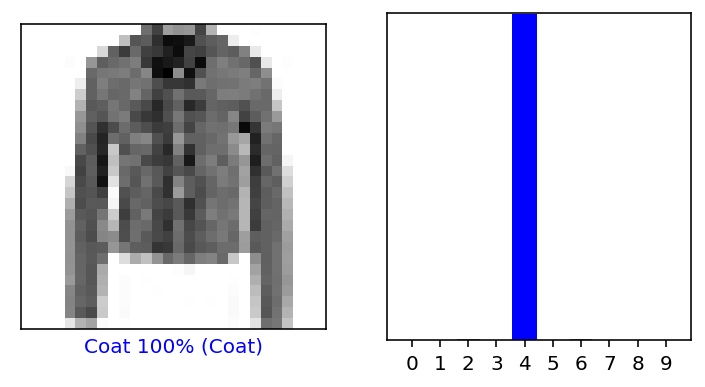

In [15]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images) # визуализируем изображения
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels) # визуализируем распределения вероятностей
plt.show()

Посмотрим для большего кол-ва образцов:

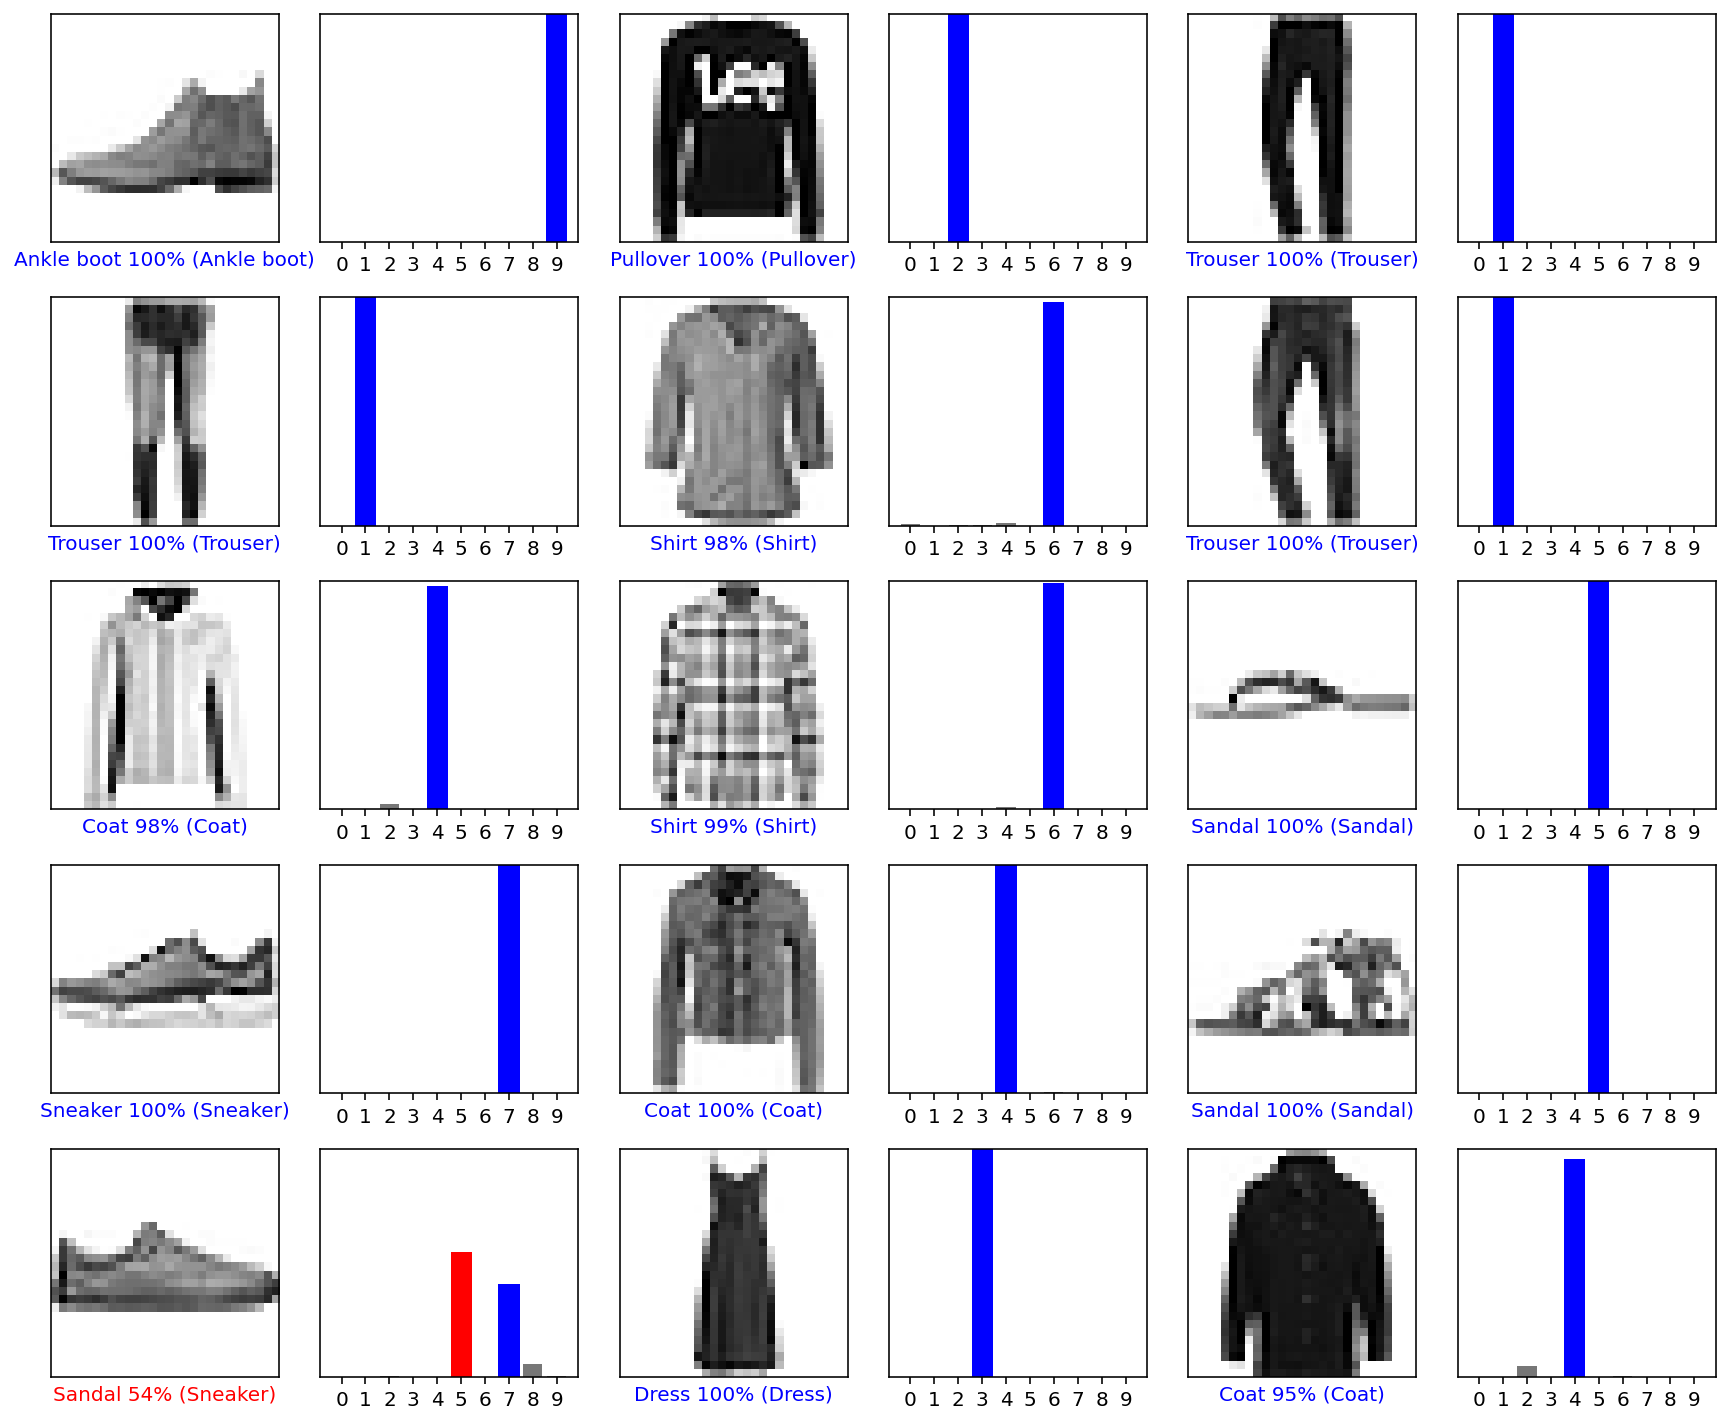

In [16]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

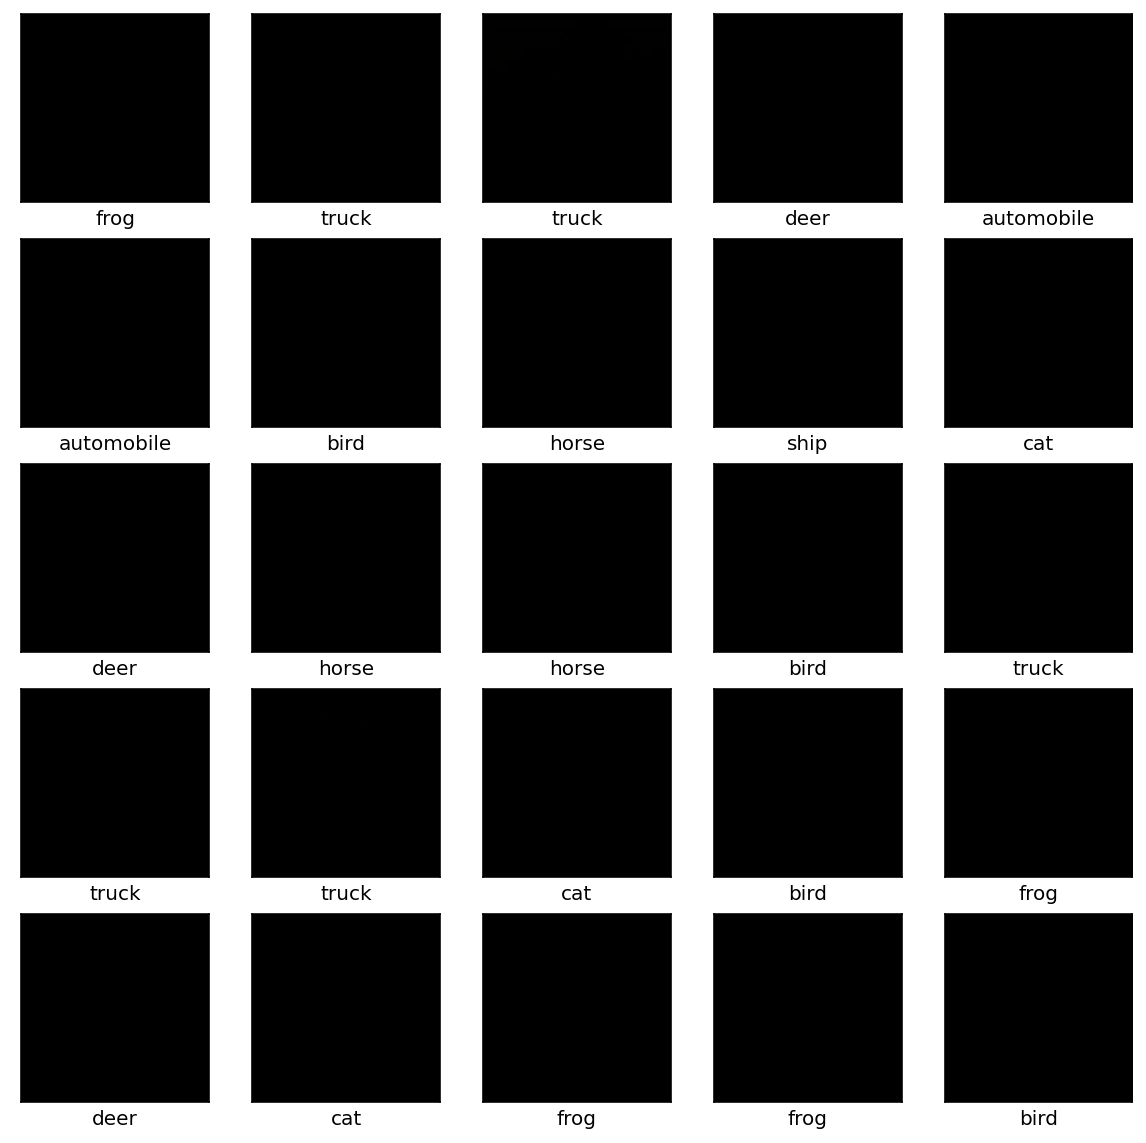

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhos

2021-09-17 15:21:39.191602: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:21:39.191719: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:21:39.191728: I tensorflow/core/common_runtime/placer.cc:114] RandomShuffle: (RandomShuffle): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:21:39.191732: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:21:39.191735: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:21:39.191740: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:21:39.191743: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:C

Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

ArgMax/dimension: Executing op __inference_train_function_138485 in device /job:localhost/replica:0/task:0/device:GPU:0
 1/16 [>.............................] - ETA: 10s - loss: 2.3026 - accuracy: 0.0625Executing op __inference_train_function_138485 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_138485 in device /job:localhost/replica:0/task:0/device:GPU:0


2021-09-17 15:21:39.789576: I tensorflow/core/common_runtime/placer.cc:114] iterator: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:21:39.789645: I tensorflow/core/common_runtime/placer.cc:114] iterator_1: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:21:39.789658: I tensorflow/core/common_runtime/placer.cc:114] sequential_3_conv2d_33_conv2d_readvariableop_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
2021-09-17 15:21:39.789664: I tensorflow/core/common_runtime/placer.cc:114] sequential_3_conv2d_33_biasadd_readvariableop_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
2021-09-17 15:21:39.789668: I tensorflow/core/common_runtime/placer.cc:114] sequential_3_conv2d_34_conv2d_readvariableop_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
2021-09-17 15:21:39.789672: I tensorflow/core/common_runtime/placer.cc:114] sequential_3_conv2d_34_biasadd_readvariableop_resource: (_Arg): /job:localhost/replica:0/ta

 3/16 [====>.........................] - ETA: 0s - loss: 2.3024 - accuracy: 0.0660 Executing op __inference_train_function_138485 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_138485 in device /job:localhost/replica:0/task:0/device:GPU:0
 5/16 [========>.....................] - ETA: 0s - loss: 2.3024 - accuracy: 0.0843Executing op __inference_train_function_138485 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_138485 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_138485 in device /job:localhost/replica:0/task:0/device:GPU:0
 8/16 [==============>...............] - ETA: 0s - loss: 2.3025 - accuracy: 0.0933Executing op __inference_train_function_138485 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_138485 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function

range/start: (Const): /Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0


2021-09-17 15:21:40.498621: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:21:40.498698: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:21:40.498715: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:21:40.498722: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:21:40.498729: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:21:40.498735: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:21:40.498742: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2021-

Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/dev

2021-09-17 15:21:41.435416: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:21:41.435544: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:21:41.435575: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:21:41.435591: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:21:41.435606: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:21:41.435621: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:21:41.435638: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2021-

Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
16/16 [=

Slice_1/size: (Const): /job:Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0


2021-09-17 15:21:42.656221: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:21:42.656369: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:21:42.656404: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:21:42.656422: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:21:42.656440: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:21:42.656458: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:21:42.656479: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2021-

Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/dev

2021-09-17 15:21:43.550051: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:21:43.550231: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:21:43.550276: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:21:43.550299: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:21:43.550321: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:21:43.550340: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-17 15:21:43.550361: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2021-

Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/dev

Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_138697 in device /job:localhost/replica:0/task:0/dev

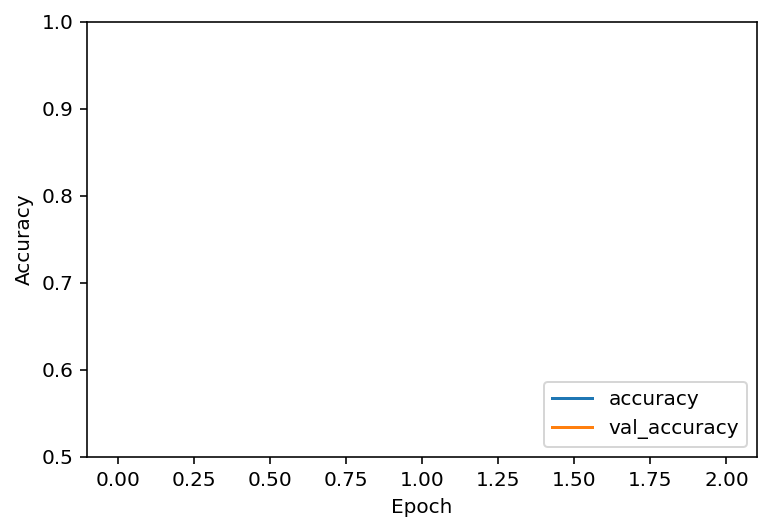

In [36]:
from tensorflow.keras import datasets, layers, models
#(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images[:500], train_labels[:500], epochs=3, 
                    validation_data=(test_images[:500], test_labels[:500]))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
